# Skin cancer detection

## AAA changing just to see if it works

## Business Problem
Skin cancer is by far the most common type of cancer.
<br>According to one estimate, about 5.4 million cases of skin cancer are diagnosed among
3.3 million people each year. (Many people are diagnosed with more than one spot of
skin cancer at the same time.)
<br>The number of skin cancers among people older than 50 has been increasing for many
years. This is probably from a combination of better skin cancer detection, people
getting more sun exposure, and people living longer.
1 out of 5 Americans will develop skin cancer by the time they are 70.
<br>What Does Skin Cancer Look Like?
<br>Skin cancers can look quite different from one person to another due to skin tone, size
and type of skin cancer and location on the body.
<br>**Causes:** Skin cancer occurs when errors (mutations) occur in the DNA of skin cells. The
mutations cause the cells to grow out of control and form a mass of cancer cells.
<br>**Risk factors:** Fair skin, light hair, freckling, moles, history of sunburns, excessive sun exposure, sunny or high-altitude climates, precancerous skin lesions, weakened
immune system and the list goes on.
<br>If you have skin cancer, it is important to know which type you have because it affects
your treatment options and your outlook (prognosis). If you aren’t sure which type of
skin cancer you have, what is recommended is that you ask your doctor so you can get
the right information.
<br>A Doctor will usually do an examination looking at all the skin moles, growths
and abnormalities to get a sense of which ones are at risk for being cancerous.
<br>But what if the Doctor is not sure?
<br>What if we could develop a tool that could help him/her make a determination with
more confidence and ensure more safety for every patient?
<br>What if, in order to make a decision about a patient, the Doctor could have the support
of advanced technology and a model that makes its determination based on a direct
comparison with thousands of other cases?
<br>This is what I am trying to achieve with my project.

Sources:
<br>[Cancer.org/skin-cancer](https://www.cancer.org/cancer/skin-cancer.html)
<br>[Cancer.org/skin-cancer-statistics](https://www.cancer.org/cancer/melanoma-skin-cancer/about/key-statistics.html)
<br>[Skincancer.org](https://www.skincancer.org/skin-cancer-information/)
<br>[MayoClinic/Skin-cancer](https://www.mayoclinic.org/diseases-conditions/skin-cancer/symptoms-causes/syc-20377605#:~:text=Skin%20cancer%20%E2%80%94%20the%20abnormal%20growth,squamous%20cell%20carcinoma%20and%20melanoma.)

## Summary:

Here talk about how we are building two models, one to identify which one of the 9 classes our image belongs to, and the other one to determine if it's a benign or malignant one.

## The Data
The dataset was taken from Kaggle at the following link:
[Skin Cancer ISIC](https://www.kaggle.com/datasets/nodoubttome/skin-cancer9-classesisic).
<br>This set consists of 2357 images of malignant and benign oncological diseases, which
were formed from The International Skin Imaging Collaboration (ISIC).
<br>The raw data comes from the [ISIC Archive](https://www.isic-archive.com/#!/topWithHeader/wideContentTop/main).
<br>The data contains images of skin anomalies that belong to 9 different classes.
<br>All images were sorted according to the classification taken with ISIC.

The data is stored in folders, already divided between train and test.
<br>The train contains 2239 images and the test contains 118 images. The images are in the
jpg format.
<br>The only two variables are the pictures and their labels, which identify the type of skin
anomaly. 
<br>The different classes are:
- actinic keratosis
- basal cell carcinoma
- dermatofibroma
- melanoma
- nevus
- pigmented benign keratosis
- seborrheic keratosis
- squamous cell carcinoma
- vascular lesion
<br>For the train the percentages for each class are the following: actinic keratosis 5%, basal
cell carcinoma 17%, dermatofibroma 4%, melanoma 20%, nevus 16%, pigmented benign
keratosis 21%, seborrheic keratosis 3%, squamous cell carcinoma 8%, vascular lesion
6%.

Let us proceed with some imports and then we will import the data.

In [1]:
from keras_preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img
import numpy as np
import os, shutil
import pandas as pd

import sys
module_path = os.path.abspath(os.path.join(os.pardir, os.pardir))
if module_path not in sys.path:
    sys.path.append(module_path)
    
from matplotlib import pyplot as plt
import matplotlib.image as mpimg
import seaborn as sns
sns.set_theme(style="white")

from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.datasets import load_digits, load_sample_images
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import accuracy_score, confusion_matrix, roc_auc_score
from sklearn.metrics import precision_score, recall_score, f1_score
#from sklearn.pipeline import Pipeline
#from sklearn.preprocessing import FunctionTransformer
#from sklearn.compose import make_column_transformer

import tensorflow as tf
#import keras
from tensorflow.keras import datasets, layers, models
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras import regularizers
from tensorflow.keras.constraints import MaxNorm
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from scikeras.wrappers import KerasClassifier

from lime import lime_image
from skimage.segmentation import mark_boundaries

# fix random seed for reproducibility
seed = 42
tf.random.set_seed(seed)

import warnings
warnings.filterwarnings("ignore")

Loading the images form the two different folders, in which they are divided in subfolders of the 9 different classes.
<br>We could load a smaller batch or smaller resolution but since we are going to need all these images to run the final model we will directly import them all, in full size.

In [2]:
# Directory path
train_data_dir = 'dataskin/Train'
test_data_dir = 'dataskin/Test'

# Get all the data in the directory data/train (2239 images)
train_generator = ImageDataGenerator().flow_from_directory(
        train_data_dir, batch_size=2239)

# Get all the data in the directory data/test (118 images)
test_generator = ImageDataGenerator().flow_from_directory(
        test_data_dir, batch_size=118)

# Create the datasets
train_images_fs, train_labels = next(train_generator)
test_images_fs, test_labels = next(test_generator)

Found 2239 images belonging to 9 classes.
Found 118 images belonging to 9 classes.


### Data Understanding:
Let us dig deeper into what each one of these classes are, and we will preview one image for each class to get a visual sense of what our model is going to be studying.

In paricular we will divide the classes in two marco classes, benign and malignant, since we will also build a model to determine if the image is ultimately of benign or cancerous nature.

### Benign Classes:

**Dermatofibroma**
<br>Dermatofibroma is a commonly occurring cutaneous entity usually centered within the skin's dermis. Dermatofibromas are referred to as benign fibrous histiocytomas of the skin, superficial/cutaneous benign fibrous histiocytomas, or common fibrous histiocytoma. 
<br>These mesenchymal cell lesions of the dermis clinically are firm subcutaneous nodules that occur on the extremities in the vast majority of cases and may or may not be associated with overlying skin changes. 
<br>They are most commonly asymptomatic and usually relatively small, less than or equal to 1 centimeter in diameter.
Let us preview a picture of it:

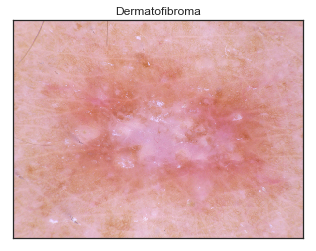

In [3]:
img = mpimg.imread('dataskin/Train/dermatofibroma/ISIC_0025223.jpg')
#this function imshow displays data as an image
imgplot = plt.imshow(img)
#show the picture
plt.title('Dermatofibroma')
# disabling xticks by Setting xticks to an empty list
plt.xticks([]) 
# disabling yticks by setting yticks to an empty list
plt.yticks([]) 
plt.show();

**Pigmented benign keratosis and Seborrheic keratosis**
<br>They are both benign keratosis, in fact most of the times they are classified together.
A seborrheic keratosis is a common noncancerous (benign) skin growth. People tend to get more of them as they get older.

Seborrheic keratoses are usually brown, black or light tan. The growths (lesions) look waxy or scaly and slightly raised. They appear gradually, usually on the face, neck, chest or back.
Seborrheic keratoses are harmless and not contagious. 

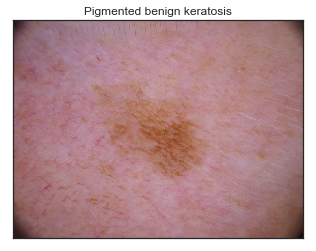

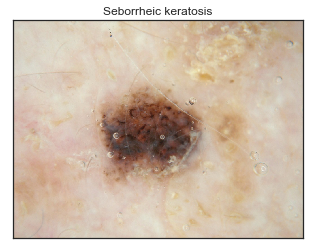

In [4]:
img = mpimg.imread('dataskin/Train/pigmented benign keratosis/ISIC_0024435.jpg')
#this function imshow displays data as an image
imgplot = plt.imshow(img)
#show the picture
plt.title('Pigmented benign keratosis')
# disabling xticks by Setting xticks to an empty list
plt.xticks([]) 
# disabling yticks by setting yticks to an empty list
plt.yticks([]) 
plt.show();
img = mpimg.imread('dataskin/Train/seborrheic keratosis/ISIC_0010810.jpg')
#this function imshow displays data as an image
imgplot = plt.imshow(img)
#show the picture
plt.title('Seborrheic keratosis')
# disabling xticks by Setting xticks to an empty list
plt.xticks([]) 
# disabling yticks by setting yticks to an empty list
plt.yticks([]) 
plt.show();

**Nevus**
<br>Moles (nevi) are a common type of skin growth. They often appear as small, dark brown spots and are caused by clusters of pigment-forming cells (melanocytes). Most people have 10 to 40 moles that appear during childhood and adolescence and may change in appearance or fade over time.

Most moles are harmless. Rarely, they become cancerous. Being aware of changes in your moles and other pigmented patches is important to detecting skin cancer, especially malignant melanoma.

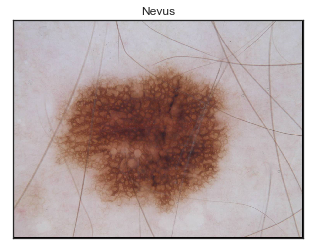

In [5]:
img = mpimg.imread('dataskin/Train/nevus/ISIC_0000019.jpg')
#this function imshow displays data as an image
imgplot = plt.imshow(img)
#show the picture
plt.title('Nevus')
# disabling xticks by Setting xticks to an empty list
plt.xticks([]) 
# disabling yticks by setting yticks to an empty list
plt.yticks([]) 
plt.show();

**Vascular lesion**
<br>Cutaneous vascular lesions are the most common pediatric birthmarks. Flat vascular malformations tend to persist, but raised vascular lesions, known as hemangiomas, generally involute.
Vascular birthmarks are commonly encountered in children and are classified as either hemangiomas or vascular malformations. 
<br>Hemangiomas are benign neoplastic proliferations of vascular endothelial cells characterized by spontaneous involution. In contrast, vascular malformations are not neoplasms but permanent morphogenic abnormalities of capillaries, veins, arteries or lymphatic vessels. <br>Flat lesions (vascular malformations) tend to persist, while raised lesions (hemangiomas) tend to regress.

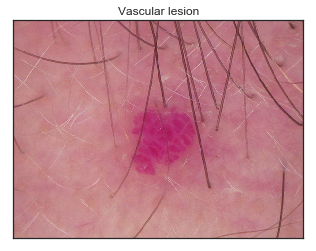

In [6]:
img = mpimg.imread('dataskin/Train/vascular lesion/ISIC_0024475.jpg')
#this function imshow displays data as an image
imgplot = plt.imshow(img)
#show the picture
plt.title('Vascular lesion')
# disabling xticks by Setting xticks to an empty list
plt.xticks([]) 
# disabling yticks by setting yticks to an empty list
plt.yticks([]) 
plt.show();

### Malignant Classes:
**Actinic keratosis**
<br>An actinic keratosis is a rough, scaly patch on the skin that develops from years of sun exposure. It's often found on the face, lips, ears, forearms, scalp, neck or back of the hands.
<br>Actinic keratoses (AKs) are premalignant since they may progress to squamous cell carcinoma. They are a common skin condition and develop in sun-exposed skin of individuals with cumulative sun exposure.
<br>Also known as a solar keratosis, an actinic keratosis grows slowly and usually first appears in people over 40.
<br>Left untreated, the risk of actinic keratoses turning into a type of skin cancer called squamous cell carcinoma is about 5% to 10%. 

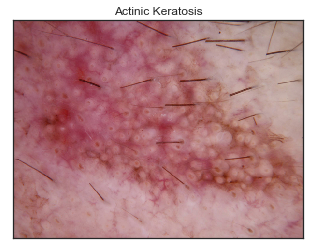

In [7]:
img = mpimg.imread('dataskin/Train/actinic keratosis/ISIC_0025780.jpg')
#this function imshow displays data as an image
imgplot = plt.imshow(img)
#show the picture
plt.title('Actinic Keratosis')
# disabling xticks by Setting xticks to an empty list
plt.xticks([]) 
# disabling yticks by setting yticks to an empty list
plt.yticks([]) 
plt.show();

**Basal cell carcinoma**
<br>Basal cell carcinoma is a type of skin cancer. Basal cell carcinoma begins in the basal cells — a type of cell within the skin that produces new skin cells as old ones die off.

Basal cell carcinoma often appears as a slightly transparent bump on the skin, though it can take other forms. Basal cell carcinoma occurs most often on areas of the skin that are exposed to the sun, such as your head and neck.

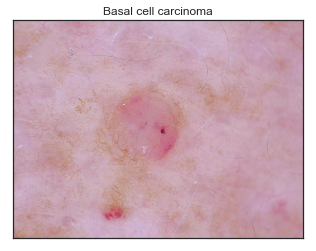

In [8]:
img = mpimg.imread('dataskin/Train/basal cell carcinoma/ISIC_0024572.jpg')
#this function imshow displays data as an image
imgplot = plt.imshow(img)
#show the picture
plt.title('Basal cell carcinoma')
# disabling xticks by Setting xticks to an empty list
plt.xticks([]) 
# disabling yticks by setting yticks to an empty list
plt.yticks([]) 
plt.show();

**Melanoma**
<br>Melanoma, the most serious type of skin cancer, develops in the cells (melanocytes) that produce melanin — the pigment that gives your skin its color. Melanoma can also form in your eyes and, rarely, inside your body, such as in your nose or throat.

The exact cause of all melanomas isn't clear, but exposure to ultraviolet (UV) radiation from sunlight or tanning lamps and beds increases your risk of developing melanoma.
<br>The risk of melanoma seems to be increasing in people under 40, especially women. Knowing the warning signs of skin cancer can help ensure that cancerous changes are detected and treated before the cancer has spread. Melanoma can be treated successfully if it is detected early.

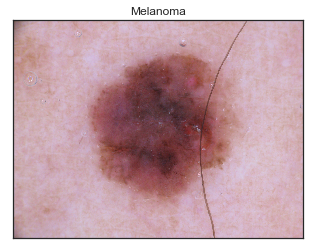

In [9]:
img = mpimg.imread('dataskin/Train/melanoma/ISIC_0000139.jpg')
#this function imshow displays data as an image
imgplot = plt.imshow(img)
#show the picture
plt.title('Melanoma')
# disabling xticks by Setting xticks to an empty list
plt.xticks([]) 
# disabling yticks by setting yticks to an empty list
plt.yticks([]) 
plt.show();

**Squamous cell carcinoma**
<br>Squamous cell carcinoma of the skin is a common form of skin cancer that develops in the squamous cells that make up the middle and outer layers of the skin.

Squamous cell carcinoma of the skin is usually not life-threatening, though it can be aggressive. Untreated, squamous cell carcinoma of the skin can grow large or spread to other parts of your body, causing serious complications.

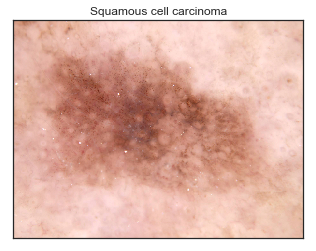

In [10]:
img = mpimg.imread('dataskin/Train/squamous cell carcinoma/ISIC_0024843.jpg')
#this function imshow displays data as an image
imgplot = plt.imshow(img)
#show the picture
plt.title('Squamous cell carcinoma')
# disabling xticks by Setting xticks to an empty list
plt.xticks([]) 
# disabling yticks by setting yticks to an empty list
plt.yticks([]) 
plt.show();

All these informations are taken from the [Mayo Clinic Website](https://www.mayoclinic.org/.) the [National Canter of Biotechonology Website](https://www.ncbi.nlm.nih.gov/) and the [American Family Physician Website](https://www.aafp.org/).

### From the Data Science point of view:

The images are expressed as matrices in which each value represent the pixel value, and specifically each image is comprised of 3 matrices overlapped, one for color Red, one for Green and one for Blue.

In [11]:
train_images_fs[0]

array([[[53., 36., 18.],
        [54., 37., 17.],
        [61., 40., 21.],
        ...,
        [37., 28., 23.],
        [31., 21., 19.],
        [25., 20., 16.]],

       [[58., 41., 23.],
        [66., 43., 25.],
        [65., 42., 24.],
        ...,
        [36., 26., 25.],
        [32., 26., 26.],
        [33., 21., 21.]],

       [[62., 43., 28.],
        [63., 44., 27.],
        [71., 46., 24.],
        ...,
        [38., 28., 27.],
        [30., 26., 25.],
        [31., 21., 20.]],

       ...,

       [[20.,  9.,  5.],
        [22.,  8.,  5.],
        [29., 12.,  5.],
        ...,
        [29., 13., 13.],
        [23., 13., 14.],
        [25., 13., 13.]],

       [[21., 10.,  8.],
        [25., 10.,  3.],
        [30., 11.,  7.],
        ...,
        [25., 14., 12.],
        [24., 13., 11.],
        [21., 13., 11.]],

       [[22.,  9.,  3.],
        [28.,  9.,  2.],
        [28., 11.,  1.],
        ...,
        [23., 11., 11.],
        [23., 11., 11.],
        [22., 12., 11.]]

Previewing one of the images from the train:

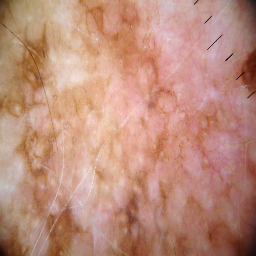

In [12]:
# Preview an image
array_to_img(train_images_fs[0])

Previewing one of the images form the test:

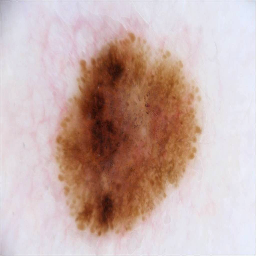

In [13]:
# Preview an image
array_to_img(test_images_fs[0])

In [14]:
train_labels.shape

(2239, 9)

In [15]:
test_labels.shape

(118, 9)

In [16]:
test_images_fs.shape

(118, 256, 256, 3)

In [17]:
train_images_fs.shape

(2239, 256, 256, 3)

In [18]:
train_labels

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [19]:
type(train_labels)

numpy.ndarray

In [20]:
type(train_images_fs)

numpy.ndarray

In [21]:
dataframe_train=pd.DataFrame(train_labels, columns=['actinic_keratosis', 'basal_cell_carcinoma',\
            'dermatofibroma', 'melanoma', 'nevus', 'pigmented_benign_keratosis',\
            'seborrheic_keratosis', 'squamous_cell_carcinoma', 'vascular_lesion'])

In [22]:
dataframe_train

,actinic_keratosis,basal_cell_carcinoma,dermatofibroma,melanoma,nevus,pigmented_benign_keratosis,seborrheic_keratosis,squamous_cell_carcinoma,vascular_lesion
0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...
2234,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2235,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2236,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2237,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [23]:
train_generator.class_indices 

{'actinic keratosis': 0,
 'basal cell carcinoma': 1,
 'dermatofibroma': 2,
 'melanoma': 3,
 'nevus': 4,
 'pigmented benign keratosis': 5,
 'seborrheic keratosis': 6,
 'squamous cell carcinoma': 7,
 'vascular lesion': 8}

In [24]:
sums=dataframe_train.sum(axis=0)

In [25]:
sums=pd.DataFrame(sums)

In [26]:
sums

,0
actinic_keratosis,114.0
basal_cell_carcinoma,376.0
dermatofibroma,95.0
melanoma,438.0
nevus,357.0
pigmented_benign_keratosis,462.0
seborrheic_keratosis,77.0
squamous_cell_carcinoma,181.0
vascular_lesion,139.0


In [27]:
sums['%'] = ((sums[0] / 2239*100).round(2).astype(str) + '%')

In [28]:
sums

,0,%
actinic_keratosis,114.0,5.09%
basal_cell_carcinoma,376.0,16.79%
dermatofibroma,95.0,4.24%
melanoma,438.0,19.56%
nevus,357.0,15.94%
pigmented_benign_keratosis,462.0,20.63%
seborrheic_keratosis,77.0,3.44%
squamous_cell_carcinoma,181.0,8.08%
vascular_lesion,139.0,6.21%


Showing in a histogram the distribution of the different images in the train set

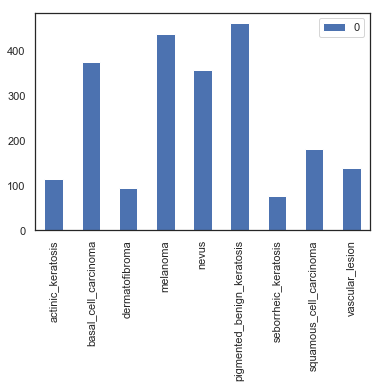

In [29]:
#Change this into seaborn to make it even cooler
sums.plot(kind='bar');

And for the test:

In [30]:
dataframe_test=pd.DataFrame(test_labels, columns=['actinic_keratosis', 'basal_cell_carcinoma',\
            'dermatofibroma', 'melanoma', 'nevus', 'pigmented_benign_keratosis',\
            'seborrheic_keratosis', 'squamous_cell_carcinoma', 'vascular_lesion'])
sums_test=dataframe_test.sum(axis=0)
sums_test=pd.DataFrame(sums_test)

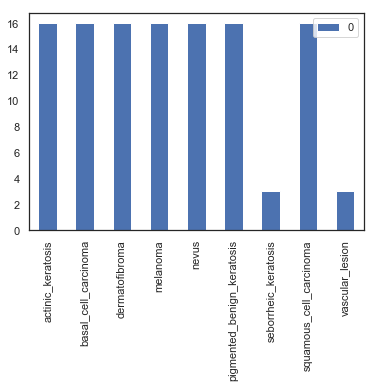

In [31]:
#Change this into seaborn to make it even cooler
sums_test.plot(kind='bar');

In [32]:
sums_test['%'] = ((sums_test[0] / 118*100).round(2).astype(str) + '%')

In [33]:
sums_test

,0,%
actinic_keratosis,16.0,13.56%
basal_cell_carcinoma,16.0,13.56%
dermatofibroma,16.0,13.56%
melanoma,16.0,13.56%
nevus,16.0,13.56%
pigmented_benign_keratosis,16.0,13.56%
seborrheic_keratosis,3.0,2.54%
squamous_cell_carcinoma,16.0,13.56%
vascular_lesion,3.0,2.54%


Melanoma is cancer 16
acitinic keartosis is pre cancer 16
basal cell is cancer 16
squamous cell cancer 16


dermatofibroma bening 16
benign keratosis 16
nevus bening 16
seborrheic bening 3 
vascular lesion bening 3

Ok so malignant is 54% and bening is 46%.
Still a good balance between the two classes, I wouldn't mess with that.
BUT it could be a problem because the distribution between the classes is different, this might be what could bring a problem to the model that hasn't "learnt" how to identify specific classes, that are less present in the train and much mor en the test.
Namely acitinic keartosis and dermatofibroma.
List this as a possible cause of lower performance.

## Preprocessing

We are going to reimport our images with a lower resolution, since we want the models to be faster especially since we want to try a lot of them, then finally when we will run the final model and test it on the test we will use our best tuned model, retraining it on the full size images.

In [34]:
# Directory path
train_data_dir = 'dataskin/Train'
test_data_dir = 'dataskin/Test'
#val_data_dir = 'dataset/validation_set'

# Get all the data in the directory data/validation (118 images), and reshape them
test_gen= ImageDataGenerator().flow_from_directory(
        test_data_dir, target_size=(32, 32), batch_size=118)

# Get all the data in the directory data/train (2239 images), and reshape them
train_gen = ImageDataGenerator().flow_from_directory(
        train_data_dir, target_size=(32, 32), batch_size=2239)

# Create the datasets
train_img32, train_lab = next(train_gen)
test_img32, test_lab = next(test_gen)

Found 118 images belonging to 9 classes.
Found 2239 images belonging to 9 classes.


In [35]:
# Explore your dataset again
m_train = train_img32.shape[0]
num_px = train_img32.shape[1]
m_test = test_img32.shape[0]

print ("Number of training samples: " + str(m_train))
print ("Number of testing samples: " + str(m_test))
print ("train_images shape: " + str(train_img32.shape))
print ("train_labels shape: " + str(train_lab.shape))
print ("test_images shape: " + str(test_img32.shape))
print ("test_labels shape: " + str(test_lab.shape))

Number of training samples: 2239
Number of testing samples: 118
train_images shape: (2239, 32, 32, 3)
train_labels shape: (2239, 9)
test_images shape: (118, 32, 32, 3)
test_labels shape: (118, 9)


Reshaping the labels into a format that can be fed to the model:

In [36]:
train_y = np.reshape(train_lab[:,0], (2239,1))

Building some functions that will help us visualize and compare the different models:

In [37]:
def visualize_training_results(results):
    history = results.history
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12,6))
    ax1.plot(history['val_acc'])
    ax1.plot(history['acc'])
    ax1.legend(['val_acc', 'acc'], loc='best')
    ax1.set_title('Accuracy')
    ax1.set_xlabel('Epochs')
    ax1.set_ylabel('Accuracy')
    
    ax2.plot(history['val_loss'])
    ax2.plot(history['loss'])
    ax2.legend(['val_loss', 'loss'], loc='best')
    ax2.set_title('Loss')
    ax2.set_xlabel('Epochs')
    ax2.set_ylabel('Loss')

Creating the empty dataframe where we will store the results:

In [38]:
# create an Empty DataFrame object
df = pd.DataFrame()

Because of the stochastic nature of Neural Networks, it is going to be hard to get consistent results.
What we can do to avoid this problem is to fit the model several times, and keep as a result the mean of the result.
Let us create a function to do that.

In [39]:
def statistic_results(model, trainX, trainy, epochs=20, batch=30):
    accu_train=[]
    accu_val=[]
    loss_train=[]
    loss_val=[]
    for i in range(10):
        resu=fit_model(model, trainX,
                    trainy, epo=epochs, batch=batch)
        accu_train.append(round(resu.history['acc'][-1],5))
        accu_val.append(round(resu.history['val_acc'][-1],5))
        loss_train.append(round(resu.history['loss'][-1],5))
        loss_val.append(round(resu.history['val_loss'][-1],5))
        i+=1
    mean_acc_train=np.mean(accu_train)
    mean_acc_val=np.mean(accu_val)
    mean_loss_train=np.mean(loss_train)
    mean_loss_val=np.mean(loss_val)
    std_at=np.std(accu_train)
    std_av=np.std(accu_val)
    std_lt=np.std(loss_train)
    std_lv=np.std(loss_val)
    return ({'Mean_accuracy_train': mean_acc_train, 
             'Mean_accuracy_validation': mean_acc_val, 
             'Mean_loss_train': mean_loss_train, 
             'Mean_loss_validation': mean_loss_val,
             'Std_acc_train': std_at,
             'Std_acc_val': std_av,
             'Std_loss_train': std_lt,
             'Std_loss_val': std_lv})    
                        

Creating two functions to preview the results of our models.
With these functions we will display the evolution of accuracy and loss in our model, during the different epochs.
Below that we will see also the values of accuracy and loss and over time we will build a learning curve, adding the result of each previous model and the current one, to see if our model is improving.
The two different funcitons are plotting this last "lerning curve" as either a line plot or a scatter plot.

In [40]:
def model_results(model, results, model_name, df, trainX, trainy ):
    visualize_training_results(results)
    stats=statistic_results(model, trainX, trainy)
    df1 = pd.DataFrame({'Name': [model_name],
        'accuracy train': stats['Mean_accuracy_train'] ,
        'accuracy validation': stats['Mean_accuracy_validation'],
        'loss train': stats['Mean_loss_train'],
        'loss validation': stats['Mean_loss_validation']})
    df=df.append(df1)
    fig = plt.subplots(figsize=(12,6))
    
    plt.subplot(1,2,1)
    x=df['Name']
    y=df['accuracy train']
    plt.plot(x, y, color='r')
    x1=df['Name']
    y1=df['accuracy validation']
    plt.plot(x1, y1, color='g')
    plt.xticks(x, labels=df['Name'], rotation='vertical')
    plt.title('Learning Curve Accuracy')
    plt.legend()
 
    plt.subplot(1,2,2)
    x=df['Name']
    y=df['loss train']
    plt.plot(x, y, color='r')
    x1=df['Name']
    y1=df['loss validation']
    plt.plot(x1, y1, color='g')
    plt.xticks(x, labels=df['Name'], rotation='vertical')
    plt.title('Learning Curve Loss')
    plt.legend()

    plt.show()
    return df

And one more function to fit the model and get the results. Also here we can set number of epochs, batch size and validation split, but there are default parameters too.

In [41]:
def fit_model(model, X, y, epo=15, batch=30, val_split=0.3, verbose=0):
    results = model.fit(X, y, epochs=epo, batch_size=batch, 
                        validation_split=val_split, verbose=verbose)
    return results

### Naive model

We will start by importing Less resolution images

In [42]:
# Directory path
train_data_dir = 'dataskin/Train'
#test_data_dir = 'dataskin/Test'

# Get all the data in the directory data/validation (118 images), and reshape them
#test_gen= ImageDataGenerator().flow_from_directory(
#        test_data_dir, target_size=(8, 8), batch_size=118)

# Get all the data in the directory data/train (2239 images), and reshape them
train_gen = ImageDataGenerator().flow_from_directory(
        train_data_dir, target_size=(8, 8), batch_size=2239)

# Create the datasets
train_img8, train_lab = next(train_gen)
#test_img, test_lab = next(test_gen)

Found 2239 images belonging to 9 classes.


In [43]:
train_img8.shape

(2239, 8, 8, 3)

In [44]:
train_y = np.reshape(train_lab[:,0], (2239,1))
#test_y = np.reshape(test_lab[:,0], (118,1))

In [45]:
model = models.Sequential()
model.add(layers.Conv2D(3, (3, 3), activation='relu',
                        input_shape=(8 ,8,  3)))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Flatten())
model.add(layers.Dense(9, activation='softmax'))

model.compile(loss='sparse_categorical_crossentropy',
              optimizer='rmsprop',
              metrics=['acc'])

In [46]:
history = fit_model(model, train_img8,
                    train_y, epo=10, batch=10)

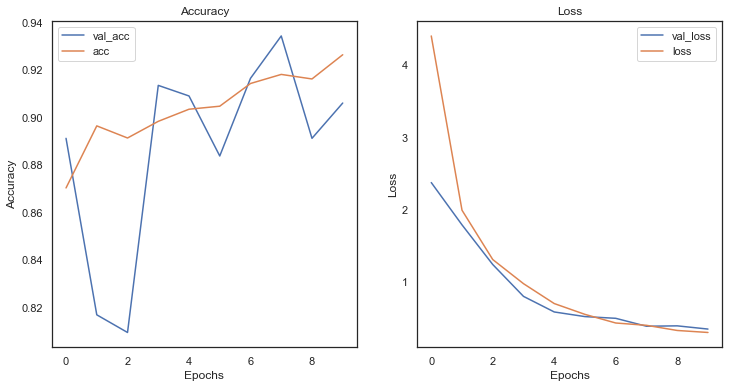

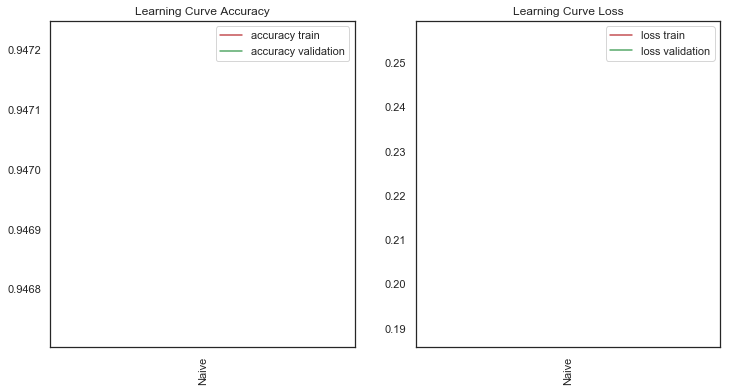

In [47]:
df=model_results(model, history, 'Naive', df, train_img8, train_y)

In [48]:
stats=statistic_results(model, train_img8,train_y)

In [49]:
stats

{'Mean_accuracy_train': 0.9467749999999999,
 'Mean_accuracy_validation': 0.946877,
 'Mean_loss_train': 0.18456899999999998,
 'Mean_loss_validation': 0.293665,
 'Std_acc_train': 0.0004221196512838649,
 'Std_acc_val': 0.0006828037785484162,
 'Std_loss_train': 0.014430699532593695,
 'Std_loss_val': 0.02853069022999619}

In [50]:
stats['Mean_accuracy_train']

0.9467749999999999

We will not use this function every time since it adds an additional long step on top of the epochs and training of the model, but it will come in handy to get more reliable results when we need them.

## Starting to improve our model:

#### To improve our model we will take several steps:
   - normalize the data 
   - increase image resolution
   - add more epochs
   - add more layers
   - increase the batch size
   - change activation function and optimization
    
<br>After this, we will do another round of tuning for the model, this time using:
 - regularization
 - drop out layers

### Improving the model with 9 classes:

Restart with an empty dataframe because while before we were looking for the lowest performance model now we are looking to improve it.

In [51]:
#df = pd.DataFrame()

Let us start by visualizing again the results from what we picked to be our naive model:

In [52]:
#df=model_results(history, 'Naive', df)
#df

#### Normalize the data:

In [53]:
train_img8[0][1]

array([[153., 131., 118.],
       [164., 142., 131.],
       [172., 145., 136.],
       [170., 133., 117.],
       [177., 152., 132.],
       [173., 157., 144.],
       [165., 135., 111.],
       [ 11.,  11.,  11.]], dtype=float32)

As we can see the RGB values of each pixel are not scaled, we are going to scale their value between 0 and 1 by dividing each pixel value by 225.
To standardize the pixel values:

In [54]:
train_img8 /= 255.

In [55]:
train_img8[0][1]

array([[0.6       , 0.5137255 , 0.4627451 ],
       [0.6431373 , 0.5568628 , 0.5137255 ],
       [0.6745098 , 0.5686275 , 0.53333336],
       [0.6666667 , 0.52156866, 0.45882353],
       [0.69411767, 0.59607846, 0.5176471 ],
       [0.6784314 , 0.6156863 , 0.5647059 ],
       [0.64705884, 0.5294118 , 0.43529412],
       [0.04313726, 0.04313726, 0.04313726]], dtype=float32)

In [56]:
history1 = fit_model(model, train_img8, train_y)

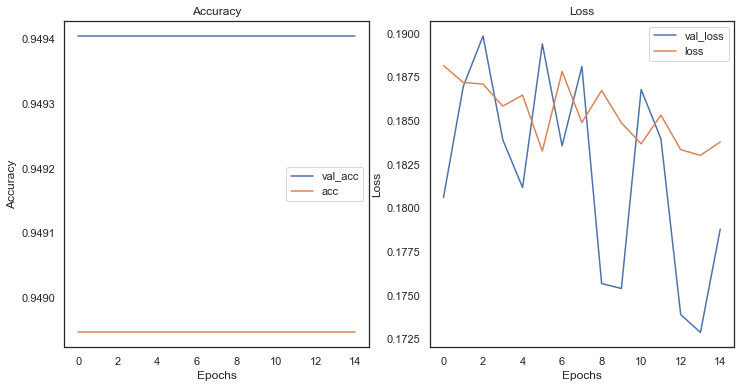

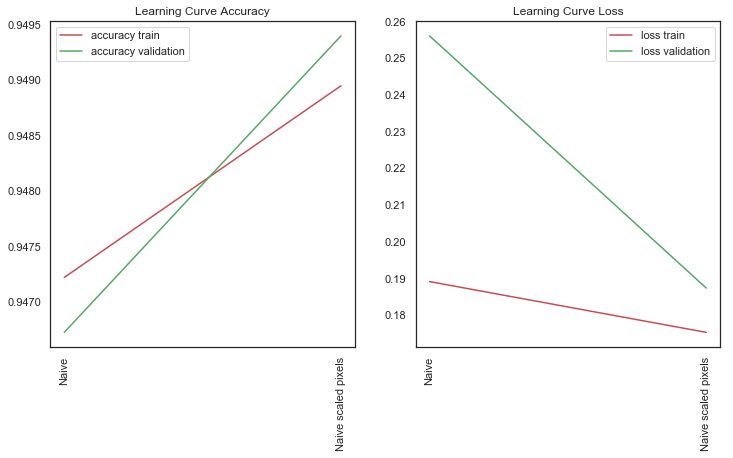

,Name,accuracy train,accuracy validation,loss train,loss validation
0,Naive,0.947223,0.946728,0.189128,0.256095
0,Naive scaled pixels,0.948950,0.949400,0.175292,0.187363


In [57]:
df=model_results(model, history1, 'Naive scaled pixels', df, train_img8, train_y)
df

#### Adding more layers:

Let us move on from the basic naive model to a more structured one with more layers.
We will define it with a function that will allow us to also tweak other parameters, which is what we will do to keep tuning our model.
With this function we can set all the parameters that we want, input_shape, activation function, loss, optimizer algorithm, metrics etc.
We will also set most of these parameters as default, except for input shape, to make the execution of the function not too heavy.

In [58]:
def create_model(input_shape=(64, 64, 3), activation='relu', 
                 loss='sparse_categorical_crossentropy', 
                optimizer='rmsprop',metrics=['acc'] , 
                 neur1=10, neur2=20, pool=(2,2)):
 # create model
    model = models.Sequential()
    model.add(layers.Conv2D(neur1, (3, 3), activation=activation,
                        input_shape=input_shape))
    model.add(layers.MaxPooling2D(pool))
    
    model.add(layers.Conv2D(neur1, (4, 4), activation=activation))
    model.add(layers.MaxPooling2D(pool))

    model.add(layers.Conv2D(neur2, (3, 3), activation=activation))
    model.add(layers.MaxPooling2D(pool))

    model.add(layers.Flatten())
    model.add(layers.Dense(32, activation=activation))
    model.add(layers.Dense(9, activation='softmax'))

# Compile model
    model.compile(loss=loss,
              optimizer=optimizer,
              metrics=metrics)
    return model

In [59]:
model_a=create_model(input_shape=(32,32,3))

In [60]:
history2 = fit_model(model_a, train_img32, train_y)

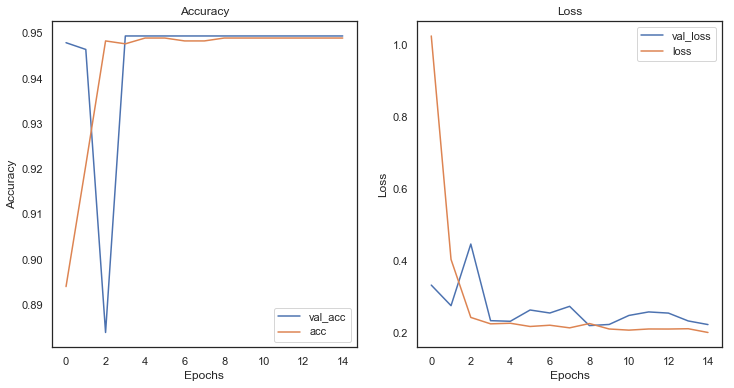

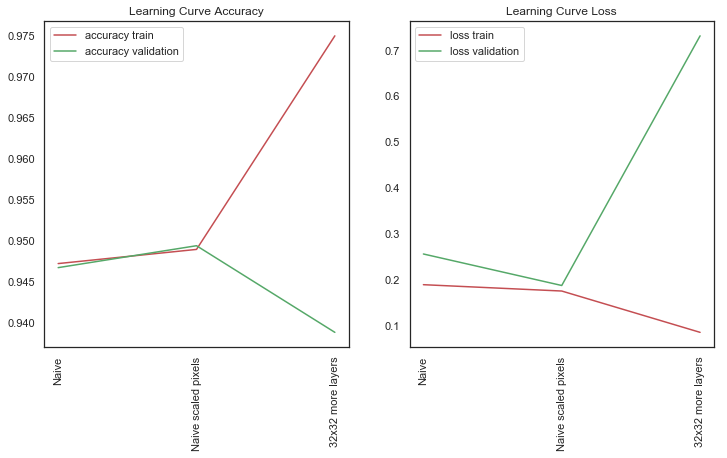

,Name,accuracy train,accuracy validation,loss train,loss validation
0,Naive,0.947223,0.946728,0.189128,0.256095
0,Naive scaled pixels,0.948950,0.949400,0.175292,0.187363
0,32x32 more layers,0.974983,0.938840,0.085165,0.731905


In [61]:
df=model_results(model_a, history2, '32x32 more layers', df, train_img32, train_y)
df

#### Increasing Image resolution:
Importing images with 64x64 image resolution.

In [62]:
# Directory path
train_data_dir = 'dataskin/Train'
test_data_dir = 'dataskin/Test'

# Get all the data in the directory data/train (2239 images), and reshape them
train_gen = ImageDataGenerator().flow_from_directory(
        train_data_dir, target_size=(64, 64), batch_size=2239)

# Get all the data in the directory data/validation (118 images), and reshape them
test_gen= ImageDataGenerator().flow_from_directory(
        test_data_dir, target_size=(64, 64), batch_size=118)

# Create the datasets
train_img64, train_lab = next(train_gen)
test_img64, test_lab = next(test_gen)

#normalizing again
train_img64 /= 255.
test_img64 /= 255.

Found 2239 images belonging to 9 classes.
Found 118 images belonging to 9 classes.


In [63]:
train_y = np.reshape(train_lab[:,0], (2239,1))
test_y = np.reshape(test_lab[:,0], (118,1))

We need to create another model, since the input shape changed:

In [64]:
# No need to specify input shape, since the default is 64x64
model_b=create_model()

Fitting the model

In [65]:
history3 = fit_model(model_b, train_img64, train_y)

Let us visualize the results:

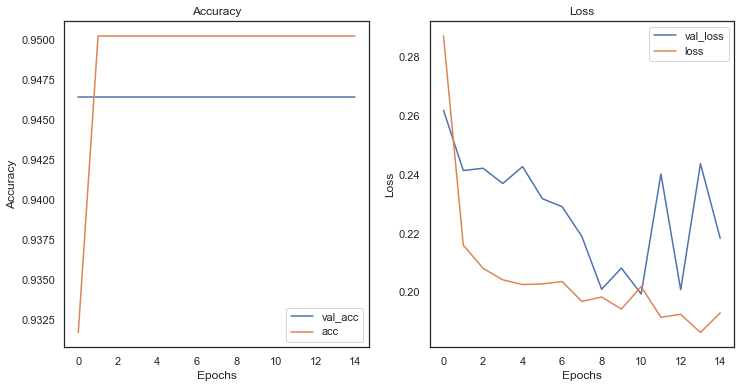

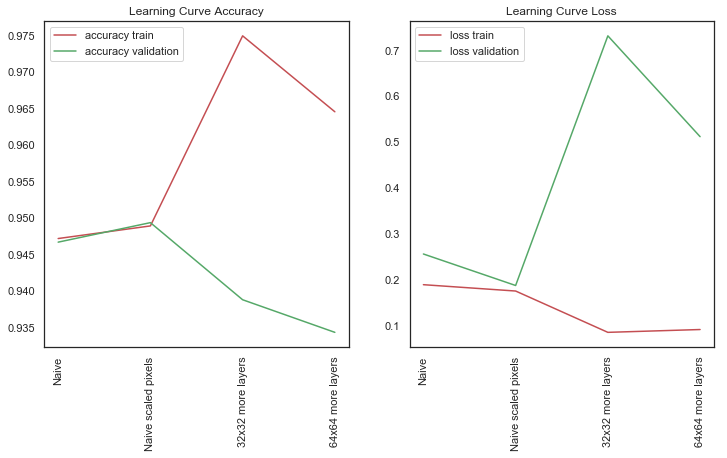

,Name,accuracy train,accuracy validation,loss train,loss validation
0,Naive,0.947223,0.946728,0.189128,0.256095
0,Naive scaled pixels,0.948950,0.949400,0.175292,0.187363
0,32x32 more layers,0.974983,0.938840,0.085165,0.731905
0,64x64 more layers,0.964583,0.934375,0.091323,0.511989


In [66]:
df=model_results(model_b, history3, '64x64 more layers', df,train_img64, train_y )
df

We tried also importing the images in their full size, and training the model on those but there was no substantial improvement in the performance, therefore we decided it was not worth the extra long computational time, and we did not include it.

Adding these images as the default in our `model_results` function since they'll be the ones we'll be using the most.

In [67]:
def model_results(model, results, model_name, df, trainX=train_img64, trainy=train_y ):
    visualize_training_results(results)
    stats=statistic_results(model, trainX, trainy)
    df1 = pd.DataFrame({'Name': [model_name],
        'accuracy train': stats['Mean_accuracy_train'] ,
        'accuracy validation': stats['Mean_accuracy_validation'],
        'loss train': stats['Mean_loss_train'],
        'loss validation': stats['Mean_loss_validation']})
    df=df.append(df1)
    fig = plt.subplots(figsize=(12,6))
    
    plt.subplot(1,2,1)
    x=df['Name']
    y=df['accuracy train']
    plt.plot(x, y, color='r')
    x1=df['Name']
    y1=df['accuracy validation']
    plt.plot(x1, y1, color='g')
    plt.xticks(x, labels=df['Name'], rotation='vertical')
    plt.title('Learning Curve Accuracy')
    plt.legend()
 
    plt.subplot(1,2,2)
    x=df['Name']
    y=df['loss train']
    plt.plot(x, y, color='r')
    x1=df['Name']
    y1=df['loss validation']
    plt.plot(x1, y1, color='g')
    plt.xticks(x, labels=df['Name'], rotation='vertical')
    plt.title('Learning Curve Loss')
    plt.legend()

    plt.show()
    return df

#### Increasing number of epochs:
Keeping the same model, but we will do it with images sizes 64 this time.

In [68]:
history4 = fit_model(model_b, train_img64, train_y, epo=30)

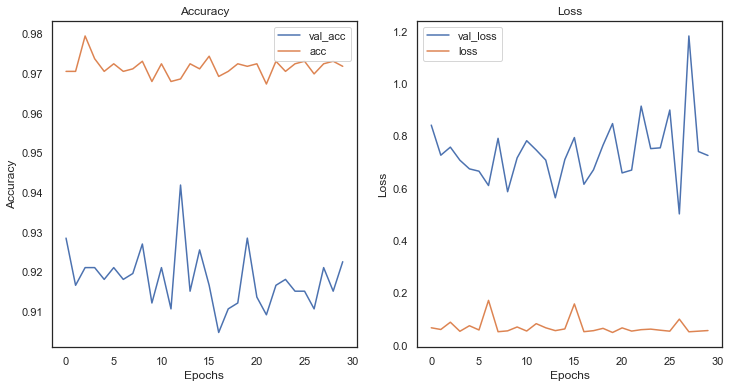

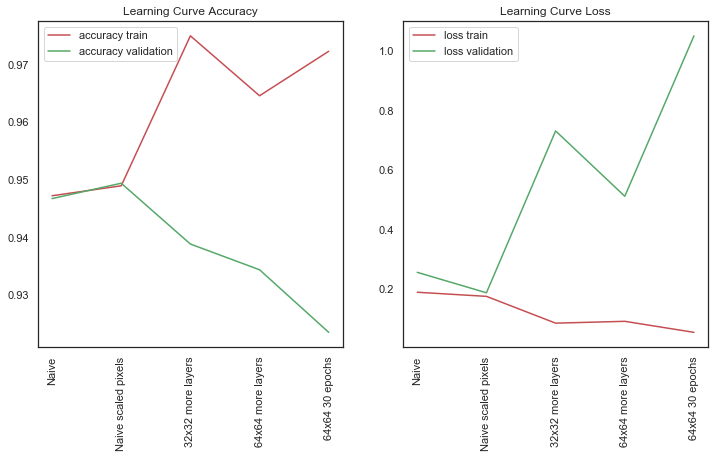

,Name,accuracy train,accuracy validation,loss train,loss validation
0,Naive,0.947223,0.946728,0.189128,0.256095
0,Naive scaled pixels,0.948950,0.949400,0.175292,0.187363
0,32x32 more layers,0.974983,0.938840,0.085165,0.731905
0,64x64 more layers,0.964583,0.934375,0.091323,0.511989
0,64x64 30 epochs,0.972304,0.923511,0.054213,1.051767


In [70]:
df=model_results(model_b, history4, '64x64 30 epochs', df)
df

#### Increase the batch size: 50

This time we will increase the batch size, which is the group of pictures taken at a time by the model to work on.

In [71]:
history5 = fit_model(model_b, train_img64, train_y, epo=30, batch=50)

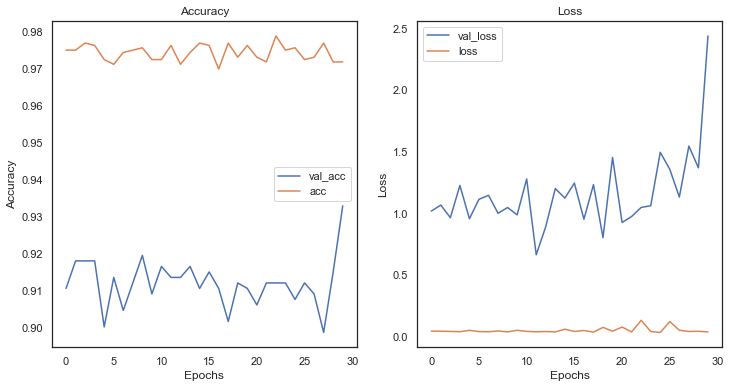

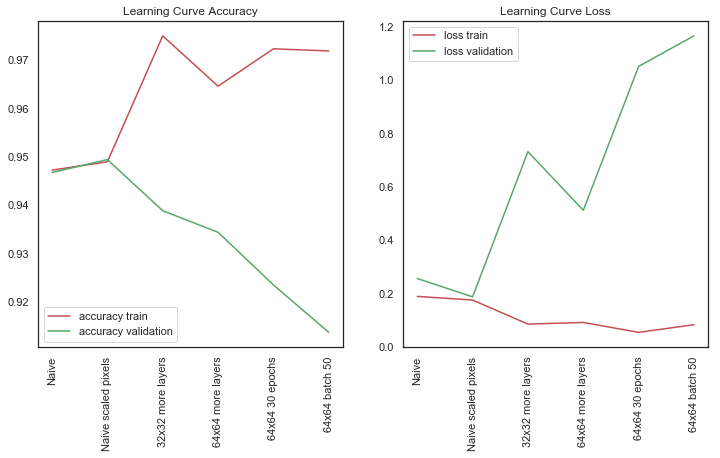

,Name,accuracy train,accuracy validation,loss train,loss validation
0,Naive,0.947223,0.946728,0.189128,0.256095
0,Naive scaled pixels,0.948950,0.949400,0.175292,0.187363
0,32x32 more layers,0.974983,0.938840,0.085165,0.731905
0,64x64 more layers,0.964583,0.934375,0.091323,0.511989
0,64x64 30 epochs,0.972304,0.923511,0.054213,1.051767
0,64x64 batch 50,0.971857,0.913691,0.082891,1.166199


In [72]:
df=model_results(model_b, history5, '64x64 batch 50', df)
df

The truth is that just getting one result for each of these attempts doesn't really tell us too much about the improvement or not of our model, because of the randomness of the results.
<br>What would be more appropriate is for each change we do (in the size of the images, the number of epochs, the batch size) to try a few different values to be able to really get a sense of in which direction our model is moving with that change.
<br>This would be very time consuming to do by hand, so the next step we are goign to take is building a grid search for these parameteres to get a better answer in terms of which ones are the optimal charateristic of our model, which gives us the best accuracy in determining the classification of the skin anomaly.

### Grid Search batch size and epochs:

Grid search is a model hyperparameter optimization technique.
In scikit learn this is a class, and when running a search with this class, we must input a dictionary of hyperparameters to evaluate in the param_grid argument. 
This dictionary contains the model parameter name and an array of values to try.

The GridSearchCV essentially builds and then evaluates one model for each combination of parameters. 
To evaluate each individual model, a 3-fold cross validation is used.

Once we  find out from the GridSearch what are the best parameteres we can use those (running just one single model) with higher resolution images.

Since GridSearch takes a long time to run, for this one and also the following ones we included the code but commented it out, saving the parameteres that were identified by the search (see below) so that the search doesn't need to be re run every time.

In [73]:
"""
# Use scikit-learn to grid search the batch size and epochs
# fix random seed for reproducibility
seed = 42
tf.random.set_seed(seed)

#set X and Y
X=train_img64
Y=train_y
# create model
model = KerasClassifier(model=create_model())
# define the grid search parameters
batch_size = [10, 20, 40, 60, 80, 100]
epochs = [10, 50, 100]
param_grid = dict(batch_size=batch_size, epochs=epochs)
grid = GridSearchCV(estimator=model, param_grid=param_grid, n_jobs=-1, cv=3)
grid_result = grid.fit(X, Y)
"""
#code from Jason Brownlee on https://machinelearningmastery.com/grid-search-hyperparameters-deep-learning-models-python-keras/

'\n# Use scikit-learn to grid search the batch size and epochs\n# fix random seed for reproducibility\nseed = 42\ntf.random.set_seed(seed)\n\n#set X and Y\nX=train_img64\nY=train_y\n# create model\nmodel = KerasClassifier(model=create_model())\n# define the grid search parameters\nbatch_size = [10, 20, 40, 60, 80, 100]\nepochs = [10, 50, 100]\nparam_grid = dict(batch_size=batch_size, epochs=epochs)\ngrid = GridSearchCV(estimator=model, param_grid=param_grid, n_jobs=-1, cv=3)\ngrid_result = grid.fit(X, Y)\n'

In [74]:
"""
# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))
    """

'\n# summarize results\nprint("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))\nmeans = grid_result.cv_results_[\'mean_test_score\']\nstds = grid_result.cv_results_[\'std_test_score\']\nparams = grid_result.cv_results_[\'params\']\nfor mean, stdev, param in zip(means, stds, params):\n    print("%f (%f) with: %r" % (mean, stdev, param))\n    '

At least these results are not all the same for the different epochs and batches. They are all different the best one is really 10 and 10

In [75]:
#best_params=grid_result.best_params_
#best_params

In [76]:
#best_batch=best_params['batch_size']

In [77]:
best_batch=10

In [78]:
#best_epochs=best_params['epochs']

In [79]:
best_epochs=10

Now we can run again a model with the higher resolution images, using the best parameters we obtained from the grid search.

In [81]:
history6 = fit_model(model_b, train_img64, train_y, epo=best_epochs,
                    batch=best_batch)

In [ ]:
df=model_results(model_b, history6, 'GSCV epochs&batch', df)
df

Changing the parameters in the definition of the function so I don't need to specify them again every time:

In [ ]:
def statistic_results(model, trainX, trainy, epochs=best_epochs, batch=best_batch):
    accu_train=[]
    accu_val=[]
    loss_train=[]
    loss_val=[]
    for i in range(10):
        resu=fit_model(model, trainX,
                    trainy, epo=epochs, batch=batch)
        accu_train.append(round(resu.history['acc'][-1],5))
        accu_val.append(round(resu.history['val_acc'][-1],5))
        loss_train.append(round(resu.history['loss'][-1],5))
        loss_val.append(round(resu.history['val_loss'][-1],5))
        i+=1
    mean_acc_train=np.mean(accu_train)
    mean_acc_val=np.mean(accu_val)
    mean_loss_train=np.mean(loss_train)
    mean_loss_val=np.mean(loss_val)
    std_at=np.std(accu_train)
    std_av=np.std(accu_val)
    std_lt=np.std(loss_train)
    std_lv=np.std(loss_val)
    return ({'Mean_accuracy_train': mean_acc_train, 
             'Mean_accuracy_validation': mean_acc_val, 
             'Mean_loss_train': mean_loss_train, 
             'Mean_loss_validation': mean_loss_val,
             'Std_acc_train': std_at,
             'Std_acc_val': std_av,
             'Std_loss_train': std_lt,
             'Std_loss_val': std_lv})

### Grid Search Optimization Algorithm:

We can run again a GridSearch, but this time instead of trying different numbers of epochs and batch sizes, we will try different optimization algorithms. Here is a lists of them, and as we can see from the number of options, GridSearch is a good idea to shorten the time in trying all the different possible combinations:

- 'SGD'
- 'RMSprop'
- 'Adagrad'
- 'Adadelta'
- 'Adam' 
- 'Adamax' 
- 'Nadam'

> two words here on SGD and Adam

We already have the function to create the model, and the X and Y we set before are the same. We just need to change the grid for the search of the parameters.

In [ ]:
"""
# create model
model = KerasClassifier(model=create_model(), 
                        loss="sparse_categorical_crossentropy", 
                        epochs=best_epochs, batch_size=best_batch)
# define the grid search parameters
optimizer = ['SGD', 'RMSprop', 'Adagrad', 'Adadelta', 'Adam', 'Adamax', 'Nadam']
param_grid = dict(optimizer=optimizer)
grid = GridSearchCV(estimator=model, param_grid=param_grid, n_jobs=-1, cv=3)
grid_result = grid.fit(X, Y)
"""
#code from Jason Brownlee on https://machinelearningmastery.com/grid-search-hyperparameters-deep-learning-models-python-keras/


In [ ]:
"""
# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))
"""

In [ ]:
#best_params=grid_result.best_params_
#best_params

In [ ]:
#best_opti=best_params['optimizer']
#best_opti

In [ ]:
### Just for now let me add this so we don't have to redo the search
best_opti='sgd'

Creating a new model with the selected optimizer algorithm:

In [ ]:
model_d=create_model(optimizer=best_opti)

In [ ]:
history7 = fit_model(model_d, train_img64, train_y,
                    epo=best_epochs,
                    batch=best_batch)

In [ ]:
df=model_results(model_d, history7, 'SGD optimization', df)
df

### Grid Search Learning Rate and Momentum

In [ ]:
"""
# fix random seed for reproducibility
seed = 42
tf.random.set_seed(seed)

#set X and Y
X=train_img64
Y=train_y
"""

In [ ]:
"""
# create model
model = KerasClassifier(model=create_model, loss="sparse_categorical_crossentropy", 
                        optimizer="SGD", epochs=20, batch_size=20, verbose=0)
# define the grid search parameters
learn_rate = [0.001, 0.01, 0.1, 0.2, 0.3]
momentum = [0.0, 0.2, 0.4, 0.6, 0.8, 0.9]
param_grid = dict(optimizer__learning_rate=learn_rate, optimizer__momentum=momentum)
grid = GridSearchCV(estimator=model, param_grid=param_grid, n_jobs=-1, cv=3)
grid_result = grid.fit(X, Y)
"""

In [ ]:
"""
# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))
    """

Let us print out just the best learning rate and momentum:

In [ ]:
#best_params=grid_result.best_params_
#best_params

In [ ]:
#best_rate=best_params['optimizer__learning_rate']
#best_rate

In [ ]:
best_rate=0.001

In [ ]:
#best_momentum=best_params['optimizer__momentum']
               

In [ ]:
best_momentum=0.9

In [ ]:
optimizer = tf.keras.optimizers.SGD(learning_rate=best_rate, 
                                    momentum=best_momentum)

In [ ]:
model_e=create_model(optimizer=optimizer)

In [ ]:
history8= fit_model(model_e, train_img64, train_y,
                     epo=best_epochs,batch=best_batch)

In [ ]:
df=model_results(model_e, history8, 'GSCV rate&momentm', df)
df

We could also do a grid search to choose the best activation function, but it doesn't make much sense in our multiclass case because the most popular one is softmax for this case, there aren't really that many options. But we will do this type of grid search later when we will reduce our problem to a binary classification problem, and there will be more options of activation fucntions to use at that point.

What we can still tune though is the number of neurons in the hidden layers.
We will do this with another grid search.

### How to Tune the Neuron Activation Function

#### Changing activation functions and optimizations:
Some of the options for activation functions are:
- relu
- swish
- softmax
- leaky relu
- sigmoid

In [ ]:
# Function to create model, required for KerasClassifier
def create_model_CV(activation='relu'):
 # create model
    model = models.Sequential()
    model.add(layers.Conv2D(10, (3, 3), activation=activation,
                        input_shape=(64,64,3)))
    model.add(layers.MaxPooling2D(2,2))
    
    model.add(layers.Conv2D(10, (4, 4), activation=activation))
    model.add(layers.MaxPooling2D(2,2))

    model.add(layers.Conv2D(20, (3, 3), activation=activation))
    model.add(layers.MaxPooling2D(2,2))

    model.add(layers.Flatten())
    model.add(layers.Dense(32, activation=activation))
    model.add(layers.Dense(9, activation='softmax'))

 # Compile model
    model.compile(loss='sparse_categorical_crossentropy', 
                   optimizer=optimizer, metrics=['accuracy'])
    return model

In [ ]:
"""
# create model
model = KerasClassifier(model=create_model_CV, epochs=20, batch_size=20)
# define the grid search parameters
activation = ['softmax', 'softplus', 'softsign', 'relu', 'tanh', 'sigmoid', 
              'hard_sigmoid', 'linear']
param_grid = dict(model__activation=activation)
grid = GridSearchCV(estimator=model, param_grid=param_grid, n_jobs=-1, cv=3)
grid_result = grid.fit(X, Y)
"""

In [ ]:
"""
# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))
    """

Best activation function is:

In [ ]:
#best_params=grid_result.best_params_
#best_params

In [ ]:
#best_function=best_params['model__activation']
#best_function

In [ ]:
best_function='softmax'

In [ ]:
model_f=create_model(activation=best_function, optimizer=optimizer)

In [ ]:
history9= fit_model(model_f, train_img64, train_y,
                     epo=best_epochs, batch=best_batch)

In [ ]:
df=model_results(model_f, history9, 'Gridsearch activation function', df)
df

### Grid Search number of neurons:

For this grid search we have to slightly modify our `create_model` function, since we are going to search 4 different numbers of neurons for each layer, there's no need to separate between the first 3 layers and the last one.

In [ ]:
# Function to create model, required for KerasClassifier
def create_model_neurons(neurons):
 # create model
    model = models.Sequential()
    model.add(layers.Conv2D(neurons, (3, 3), activation='softmax',
                        input_shape=(64, 64, 3)))
    model.add(layers.MaxPooling2D((2, 2)))
    
    model.add(layers.Conv2D(neurons, (4, 4), activation='softmax'))
    model.add(layers.MaxPooling2D((2, 2)))

    model.add(layers.Conv2D(neurons, (3, 3), activation='softmax'))
    model.add(layers.MaxPooling2D((2, 2)))

    model.add(layers.Flatten())
    model.add(layers.Dense(neurons, activation='softmax'))
    model.add(layers.Dense(9, activation='softmax'))

# Compile model
    model.compile(loss='sparse_categorical_crossentropy',
              optimizer=best_opti,
              metrics=['acc'])
    return model

In [ ]:
# fix random seed for reproducibility
seed = 42
tf.random.set_seed(seed)
#set X and Y
X=train_img64
Y=train_y

In [ ]:
"""
# create model
model = KerasClassifier(model=create_model_neurons, epochs=100, batch_size=50, verbose=0)
# define the grid search parameters
neurons = [1, 5, 10, 15, 20, 25, 30]
param_grid = dict(model__neurons=neurons)
grid = GridSearchCV(estimator=model, param_grid=param_grid, n_jobs=-1, cv=3)
grid_result = grid.fit(X, Y)
#"""
#code from Jason Brownlee on https://machinelearningmastery.com/grid-search-hyperparameters-deep-learning-models-python-keras/

In [ ]:
"""
# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))
    """

In [ ]:
#results=grid_result.best_params_
#results

In [ ]:
#neurons=results['model__neurons']
#neurons

model_neurons 1. Doesn't make sense. But it's also because all the results are the same. We will choose a standard value and pick 10.

In [ ]:
best_neurons=10

In [ ]:
model_g=create_model(activation=best_function, optimizer=optimizer,
                     neur1=best_neurons)

In [ ]:
history10 = fit_model(model_g, train_img64,train_y,
                     epo=best_epochs,batch=best_batch)

In [ ]:
df=model_results(model_g, history10, 'Gridsearch neurons', df)
df

## Tuning

Now that we selected all the best parameters for our model, there is some more tuning that we can do in particular to make sure that our model will not overfit the data.
This is achieved with regularization, dropout layers and early stopping.

### Regularization

Regularization is commonly used when the model is overfitting the data.
The main idea of regularization therefore is to penalize in some way a model that is too complex, that will tend to overfit the data.
L1 regularization just adds one parameter, is not commonly used in Neural Networks.
L2 on the other hand, also called "weigth decay", makes the weights smaller, penalizing especially the largest weights, in a way forcing the model to be simplified.

In [ ]:
model_h = models.Sequential()
model_h.add(layers.Conv2D(10, (3, 3), activation='softmax'))
model_h.add(layers.MaxPooling2D((2, 2)))
    
model_h.add(layers.Conv2D(10, (4, 4), activation='softmax'
                         ,kernel_regularizer=regularizers.L2(l2=0.05)))
model_h.add(layers.MaxPooling2D((2, 2)))
model_h.add(layers.Conv2D(10, (3, 3), activation='softmax'
                          ,kernel_regularizer=regularizers.L2(l2=0.05)))
model_h.add(layers.MaxPooling2D((2, 2)))

model_h.add(layers.Flatten())
model_h.add(layers.Dense(32, activation='softmax' 
                       ,kernel_regularizer=regularizers.L2(l2=0.05)))
model_h.add(layers.Dense(9, activation='softmax'))

# Compile model
model_h.compile(loss='sparse_categorical_crossentropy',
              optimizer=optimizer,
              metrics=['acc'])


In [ ]:
history11 = fit_model(model_h, train_img64,train_y, epo=best_epochs,batch=best_batch)

In [ ]:
df=model_results(model_h, history11, 'after regularization', df)
df

We tried also regularization paramteres L2=0.005, L2=0.01, but the best value turned out to be L2=0.05, and we have not included the other ones for brevity.

### Dropout Regularization

Dropout layers, forces the model to block out some nodes, for the model to not rely heavily on certain paths.

In [ ]:
# Function to create model, required for KerasClassifier
def create_model_drop(dropout_rate, weight_constraint):

    model = models.Sequential()
    model.add(layers.Conv2D(best_neurons, (3, 3), activation='softmax',
                        input_shape=(64, 64, 3)))
    model.add(layers.MaxPooling2D((2, 2)))
    
    model.add(layers.Conv2D(best_neurons, (4, 4), activation='softmax',
                         kernel_regularizer=regularizers.L2(l2=0.05), 
                          kernel_constraint=MaxNorm(weight_constraint)))
    model.add(layers.MaxPooling2D((2, 2)))
# Implement dropout to the first hidden layer 
    model.add(layers.Dropout(dropout_rate))
            

    model.add(layers.Conv2D(best_neurons, (3, 3), activation='softmax', 
                        kernel_regularizer=regularizers.L2(l2=0.05), 
                          kernel_constraint=MaxNorm(weight_constraint)))
    model.add(layers.MaxPooling2D((2, 2)))
            
# Implement dropout to the second hidden layer 
    model.add(layers.Dropout(dropout_rate))            

    model.add(layers.Flatten())
    model.add(layers.Dense(32, activation='softmax', 
                       kernel_regularizer=regularizers.L2(l2=0.05)))
    model.add(layers.Dense(9, activation='softmax'))

# Compile model
    model.compile(loss='sparse_categorical_crossentropy',
              optimizer=optimizer,
              metrics=['acc'])
    return model

In [ ]:
"""
# create model
model = KerasClassifier(model=create_model_drop, epochs=30, batch_size=20)
# define the grid search parameters
weight_constraint = [1.0, 2.0, 3.0, 4.0, 5.0]
#dropout_rate = [0.0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]
dropout_rate = [0.0, 0.3, 0.5, 0.7, 0.9]
param_grid = dict(model__dropout_rate=dropout_rate, 
                  model__weight_constraint=weight_constraint)
#param_grid = dict(model__dropout_rate=dropout_rate)
grid = GridSearchCV(estimator=model, param_grid=param_grid, n_jobs=-1, cv=3)
grid_result = grid.fit(X, Y)
"""

In [ ]:
"""
# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))
    """

In [ ]:
#best_params=grid_result.best_params_
#best_params

In [ ]:
#best_drop=best_params['model__dropout_rate']
#best_drop

In [ ]:
best_drop=0.5

In [ ]:
#best_weight_const=best_params['model__weight_constraint']

In [ ]:
best_weight_const=3.0

Now that it is clear from the grid search what is the best drop out rate let us create our model with it and see the results in comparison to the other models.

In [ ]:
model_i = models.Sequential()
model_i.add(layers.Conv2D(best_neurons, (3, 3), activation='softmax',
                        input_shape=(64, 64, 3)))
model_i.add(layers.MaxPooling2D((2, 2)))
    
model_i.add(layers.Conv2D(best_neurons, (4, 4), activation='softmax',
                         kernel_regularizer=regularizers.L2(l2=0.05), 
                          kernel_constraint=MaxNorm(best_weight_const)))
model_i.add(layers.MaxPooling2D((2, 2)))
# Implement dropout to the first hidden layer 
model_i.add(layers.Dropout(best_drop))
            
model_i.add(layers.Conv2D(best_neurons, (3, 3), activation='softmax', 
                        kernel_regularizer=regularizers.L2(l2=0.05), 
                          kernel_constraint=MaxNorm(best_weight_const)))
model_i.add(layers.MaxPooling2D((2, 2)))
            
# Implement dropout to the second hidden layer 
model_i.add(layers.Dropout(best_drop))            

model_i.add(layers.Flatten())
model_i.add(layers.Dense(32, activation='softmax', 
                       kernel_regularizer=regularizers.L2(l2=0.05)))
model_i.add(layers.Dense(9, activation='softmax'))

# Compile model
model_i.compile(loss='sparse_categorical_crossentropy',
              optimizer=optimizer,
              metrics=['acc'])

# Compile model
model_i.compile(loss='sparse_categorical_crossentropy',
              optimizer=optimizer,
              metrics=['acc'])
              

In [ ]:
history12 = fit_model(model_i, train_img64,train_y,
                     epo=best_epochs,batch=best_batch)

In [ ]:
df=model_results(model_i, history12, 'after dropout', df)
df

### Best model

> This final i model, explain a bit your choice.

### Evaluate the model:

To evaluate the train we will calculate the loss and accuracy, both on the train and on the test set, which so far we haven't touched, it is therefore unseen data.

#### On the train:

In [ ]:
train_loss, train_acc = model_i.evaluate(train_img64, train_y)

print('Train Loss:', train_loss, '\nTrain Accuracy:', train_acc)

#### On the test:

In [ ]:
test_loss, test_acc= model_i.evaluate(test_img64, test_y)

print('Test Loss:', test_loss, '\nTest Accuracy:', test_acc)

#### Doing it again with 256x256 images:

In [ ]:
#normalizing again
train_images_fs /= 255.
test_images_fs /= 255.

In [ ]:
"""
#Creating same model but with input shape 256x256
model_j = models.Sequential()
model_j.add(layers.Conv2D(best_neurons, (3, 3), activation='softmax',
                        input_shape=(256, 256, 3)))
model_j.add(layers.MaxPooling2D((2, 2)))
    
model_j.add(layers.Conv2D(best_neurons, (4, 4), activation='softmax',
                         kernel_regularizer=regularizers.L2(l2=0.05), 
                          kernel_constraint=MaxNorm(best_weight_const)))
model_j.add(layers.MaxPooling2D((2, 2)))
# Implement dropout to the first hidden layer 
model_j.add(layers.Dropout(best_drop))
            
model_j.add(layers.Conv2D(best_neurons, (3, 3), activation='softmax', 
                        kernel_regularizer=regularizers.L2(l2=0.05), 
                          kernel_constraint=MaxNorm(best_weight_const)))
model_j.add(layers.MaxPooling2D((2, 2)))
            
# Implement dropout to the second hidden layer 
model_j.add(layers.Dropout(best_drop))            

model_j.add(layers.Flatten())
model_j.add(layers.Dense(32, activation='softmax', 
                       kernel_regularizer=regularizers.L2(l2=0.05)))
model_j.add(layers.Dense(9, activation='softmax'))

# Compile model
model_j.compile(loss='sparse_categorical_crossentropy',
              optimizer=optimizer,
              metrics=['acc'])
              """

In [ ]:
# takes a long time!
###model_j.fit(train_images_fs, train_y,  epochs=best_epochs,
###                batch_size=best_batch)
#callbacks=early_stopping) Figure out if you want to include this

In [ ]:
#train_loss, train_acc = model_j.evaluate(train_images_fs, train_y)

#print('Train Loss:', train_loss, '\nTrain Accuracy:', train_acc)

In [ ]:
#test_loss, test_acc= model_j.evaluate(test_images_fs, test_y)

#print('Test Loss:', test_loss, '\nTest Accuracy:', test_acc)

## Changing to two classes cancerous and bening

Next I will work on the data, creating a separate folder 'binary' in which I will store the images divided into 2 classes instead of 9, 'benign' and 'cancerous'.
<br>This folder will still have the same division into train and test that the original data has.
<br>Some of the code below is commented out as we wanted to create the directory and copy the images only once, and not every time that the notebook is compiled, but a user that would want to do the same can uncomment and proceed with the code as is to create the same directories and subfolders.

#### Train Set:

In [ ]:
acti_dir = 'dataskin/Train/actinic keratosis'
basal_dir = 'dataskin/Train/basal cell carcinoma'
derma_dir = 'dataskin/Train/dermatofibroma'
mela_dir = 'dataskin/Train/melanoma'
nevus_dir = 'dataskin/Train/nevus'
pigm_dir = 'dataskin/Train/pigmented benign keratosis'
sebo_dir = 'dataskin/Train/seborrheic keratosis'
squa_dir = 'dataskin/Train/squamous cell carcinoma'
lesion_dir = 'dataskin/Train/vascular lesion'

new_dir = 'dataskin/binary/'

In [ ]:
imgs_acti = [file for file in os.listdir(acti_dir) if file.endswith('.jpg')]
print('There are', len(imgs_acti), 'images of actinic keratosis')
imgs_basal = [file for file in os.listdir(basal_dir) if file.endswith('.jpg')]
print('There are', len(imgs_basal), 'images of basal cell carcinoma')
imgs_mela = [file for file in os.listdir(mela_dir) if file.endswith('.jpg')]
print('There are', len(imgs_mela), 'images of melanoma')
imgs_squa = [file for file in os.listdir(squa_dir) if file.endswith('.jpg')]
print('There are', len(imgs_squa), 'images of squamous cell carcinoma')

imgs_derma = [file for file in os.listdir(derma_dir) if file.endswith('.jpg')]
print('There are', len(imgs_derma), 'images of dermatofibroma')
imgs_nevus = [file for file in os.listdir(nevus_dir) if file.endswith('.jpg')]
print('There are', len(imgs_nevus), 'images of nevus')
imgs_pigm = [file for file in os.listdir(pigm_dir) if file.endswith('.jpg')]
print('There are', len(imgs_pigm), 'images of pigmented benign keratosis')
imgs_sebo = [file for file in os.listdir(sebo_dir) if file.endswith('.jpg')]
print('There are', len(imgs_sebo), 'images of seborrheic keratosis')
imgs_lesion = [file for file in os.listdir(lesion_dir) if file.endswith('.jpg')]
#print('There are', len(imgs_lesion), 'images of vascula lesion')

In [ ]:
# Code to create the new doler 'binary'
#os.mkdir(new_dir)

In [ ]:
""" Code to create paths to subfolders
train_folder = os.path.join(new_dir, 'train')
train_benign = os.path.join(train_folder, 'benign')
train_cancerous = os.path.join(train_folder, 'cancerous')

test_folder = os.path.join(new_dir, 'test')
test_benign = os.path.join(test_folder, 'benign')
test_cancerous = os.path.join(test_folder, 'cancerous')
"""

In [ ]:
""" Code to create subfolders

os.mkdir(train_folder)
os.mkdir(train_benign)
os.mkdir(train_cancerous)

os.mkdir(test_folder)
os.mkdir(test_benign)
os.mkdir(test_cancerous)
"""

We have to split the classes between benign and cancerou, so recall:
<br>Actinic keratosis, basal cell carcinoma, melanoma and squamous cell carcinoma are cancerous.
<br>Dermatofibroma, pigmented benign keratosis, nevus, seborrheic keratosis and vascular lesions are benign.
<br>As totals we except:

In [ ]:
total_benign=len(imgs_derma)+len(imgs_nevus)+len(imgs_pigm)+len(imgs_sebo)+len(imgs_lesion)
total_cancerous=len(imgs_acti)+len(imgs_basal)+len(imgs_mela)+len(imgs_squa)
print(f'total bening {total_benign}, total cancerous {total_cancerous}')

In [ ]:
""" Code to copy images from dermatofibroma into new folder 'benign'
# train benign
imgs = imgs_derma
for img in imgs:
    origin = os.path.join(derma_dir, img)
    destination = os.path.join(train_benign, img)
    shutil.copyfile(origin, destination)
    """

Now let us repeat that for all the other benign classes:

In [ ]:
""" Code to copy images from 4 folders into new folder 'benign'
imgs = imgs_nevus
for img in imgs:
    origin = os.path.join(nevus_dir, img)
    destination = os.path.join(train_benign, img)
    shutil.copyfile(origin, destination)
imgs = imgs_pigm
for img in imgs:
    origin = os.path.join(pigm_dir, img)
    destination = os.path.join(train_benign, img)
    shutil.copyfile(origin, destination)
imgs = imgs_sebo
for img in imgs:
    origin = os.path.join(sebo_dir, img)
    destination = os.path.join(train_benign, img)
    shutil.copyfile(origin, destination)
imgs = imgs_lesion
for img in imgs:
    origin = os.path.join(lesion_dir, img)
    destination = os.path.join(train_benign, img)
    shutil.copyfile(origin, destination)
    """ 

In [ ]:
train_benign_dir = 'dataskin/binary/train/benign'

imgs_acti = [file for file in os.listdir(train_benign_dir) if file.endswith('.jpg')]
print('There are', len(imgs_acti), 'images in train benign')

Moving on to the cancerous class:

In [ ]:
""" Code to copy images from 4 folders into new folder 'cancerous'
#train cancerous
imgs = imgs_acti
for img in imgs:
    origin = os.path.join(acti_dir, img)
    destination = os.path.join(train_cancerous, img)
    shutil.copyfile(origin, destination)
imgs = imgs_basal
for img in imgs:
    origin = os.path.join(basal_dir, img)
    destination = os.path.join(train_cancerous, img)
    shutil.copyfile(origin, destination)
imgs = imgs_mela
for img in imgs:
    origin = os.path.join(mela_dir, img)
    destination = os.path.join(train_cancerous, img)
    shutil.copyfile(origin, destination)
imgs = imgs_squa
for img in imgs:
    origin = os.path.join(squa_dir, img)
    destination = os.path.join(train_cancerous, img)
    shutil.copyfile(origin, destination)
    """

In [ ]:
train_can_dir = 'dataskin/binary/train/cancerous'

imgs_acti = [file for file in os.listdir(train_can_dir) if file.endswith('.jpg')]
print('There are', len(imgs_acti), 'images in train cancerous')

#### Test Set:
Now I just need to repeat the same steps for the test:

In [ ]:
acti_dir = 'dataskin/Test/actinic keratosis'
basal_dir = 'dataskin/Test/basal cell carcinoma'
derma_dir = 'dataskin/Test/dermatofibroma'
mela_dir = 'dataskin/Test/melanoma'
nevus_dir = 'dataskin/Test/nevus'
pigm_dir = 'dataskin/Test/pigmented benign keratosis'
sebo_dir = 'dataskin/Test/seborrheic keratosis'
squa_dir = 'dataskin/Test/squamous cell carcinoma'
lesion_dir = 'dataskin/Test/vascular lesion'

In [ ]:
imgs_acti = [file for file in os.listdir(acti_dir) if file.endswith('.jpg')]
print('There are', len(imgs_acti), 'images of actinic keratosis')
imgs_basal = [file for file in os.listdir(basal_dir) if file.endswith('.jpg')]
print('There are', len(imgs_basal), 'images of basal cell carcinoma')
imgs_mela = [file for file in os.listdir(mela_dir) if file.endswith('.jpg')]
print('There are', len(imgs_mela), 'images of melanoma')
imgs_squa = [file for file in os.listdir(squa_dir) if file.endswith('.jpg')]
print('There are', len(imgs_squa), 'images of squamous cell carcinoma')

imgs_derma = [file for file in os.listdir(derma_dir) if file.endswith('.jpg')]
print('There are', len(imgs_derma), 'images of dermatofibroma')
imgs_nevus = [file for file in os.listdir(nevus_dir) if file.endswith('.jpg')]
print('There are', len(imgs_nevus), 'images of nevus')
imgs_pigm = [file for file in os.listdir(pigm_dir) if file.endswith('.jpg')]
print('There are', len(imgs_pigm), 'images of pigmented benign keratosis')
imgs_sebo = [file for file in os.listdir(sebo_dir) if file.endswith('.jpg')]
print('There are', len(imgs_sebo), 'images of seborrheic keratosis')
imgs_lesion = [file for file in os.listdir(lesion_dir) if file.endswith('.jpg')]
print('There are', len(imgs_lesion), 'images of vascula lesion')

In [ ]:
total_benign=len(imgs_derma)+len(imgs_nevus)+len(imgs_pigm)+len(imgs_sebo)+len(imgs_lesion)
total_cancerous=len(imgs_acti)+len(imgs_basal)+len(imgs_mela)+len(imgs_squa)
print(f'total bening {total_benign}, total cancerous {total_cancerous}')

In [ ]:
""" Code to copy images from 5 folders into new folder 'benign'
# test benign
imgs = imgs_derma
for img in imgs:
    origin = os.path.join(derma_dir, img)
    destination = os.path.join(test_benign, img)
    shutil.copyfile(origin, destination)
imgs = imgs_nevus
for img in imgs:
    origin = os.path.join(nevus_dir, img)
    destination = os.path.join(test_benign, img)
    shutil.copyfile(origin, destination)
imgs = imgs_pigm
for img in imgs:
    origin = os.path.join(pigm_dir, img)
    destination = os.path.join(test_benign, img)
    shutil.copyfile(origin, destination)
imgs = imgs_sebo
for img in imgs:
    origin = os.path.join(sebo_dir, img)
    destination = os.path.join(test_benign, img)
    shutil.copyfile(origin, destination)
imgs = imgs_lesion
for img in imgs:
    origin = os.path.join(lesion_dir, img)
    destination = os.path.join(test_benign, img)
    shutil.copyfile(origin, destination)
    """

In [ ]:
test_benign_dir = 'dataskin/binary/test/benign'

imgs_test = [file for file in os.listdir(test_benign_dir) if file.endswith('.jpg')]
print('There are', len(imgs_test), 'images in test benign')

In [ ]:
""" Code to copy images from 4 folders into new folder 'cancerous'
#test cancerous
imgs = imgs_acti
for img in imgs:
    origin = os.path.join(acti_dir, img)
    destination = os.path.join(test_cancerous, img)
    shutil.copyfile(origin, destination)
imgs = imgs_basal
for img in imgs:
    origin = os.path.join(basal_dir, img)
    destination = os.path.join(test_cancerous, img)
    shutil.copyfile(origin, destination)
imgs = imgs_mela
for img in imgs:
    origin = os.path.join(mela_dir, img)
    destination = os.path.join(test_cancerous, img)
    shutil.copyfile(origin, destination)
imgs = imgs_squa
for img in imgs:
    origin = os.path.join(squa_dir, img)
    destination = os.path.join(test_cancerous, img)
    shutil.copyfile(origin, destination)
"""

In [ ]:
test_can_dir = 'dataskin/binary/test/cancerous'

imgs_acti = [file for file in os.listdir(test_can_dir) if file.endswith('.jpg')]
print('There are', len(imgs_acti), 'images in test cancerous')

#### In the case of class imbalance:

If there was an imbalance between the classes we could balance them using augmentation, which consists in generating more data from the images we already have.
<br>If for example we had many more images of bening growths, we could generate more images form the ones we have of cancerous growths.
<br>This technique allows to rotate, shift, zoom and filp an image, to generate a slightly different one form the original, to be included in the data used to train our model.
<br>We include here the code to do so, if a user wanted to try this out, especially if, using a different dataset that was to be imbalanced, one wanted to balance it out.

In [ ]:
"""
# If there is an imbalance re balance the classes with augmentation
train_datagen = ImageDataGenerator(rescale=1./255, 
                                   rotation_range=40, 
                                   width_shift_range=0.2, 
                                   height_shift_range=0.2, 
                                   shear_range=0.3, 
                                   zoom_range=0.1, 
                                   horizontal_flip=True)

#to preview an example
names = [os.path.join(train_benign, name) for name in os.listdir(train_benign)]
img_path = names[91]
img = load_img(img_path, target_size=(64, 64))

reshape_img = img_to_array(img) 
reshape_img = reshape_img.reshape((1,) + reshape_img.shape) 
i=0
for batch in train_datagen.flow(reshape_img, batch_size=1):
    plt.figure(i)
    imgplot = plt.imshow(array_to_img(batch[0]))
    i += 1
    if i % 3 == 0:
        break
plt.show()
"""

> Talk about how now we are going to track recall too, why it is important, and now let's 
> modify the function to save results

### New Metrics: Recall and F1 score

Now that we have defined the problem in a different way, having two classes and therefore making it a binary problem, we can define and use differnt metrics to evaluate our models.
<br>In particular a metric that is ver widely used in the medical field is recall, which tells us how many cases were classified incorrectly and had to be "recalled", for example if a growth was classified and benign and turned out to be actually cancerous.
<br>We want to obviouslt minimize these instances, and in a way we care more about a higher recall than even accuracy, to be extra cautious in facing such a delicate issue.
<br>We will keep an eye on F1 which gives us an overall sense of the performance of the model (to make sure we are not getting an amazing recall while all the other metrics are plummeting) and we will keep looking at accuracy and loss as we have done before.

Let us define a few new functions to introduce these metrics and keep track of them:

In [ ]:
def calculate_metrics(model, trainX=train_img64, trainy=train_y, epochs=20, batch=30):
    recs=[]
    f1s=[]
    for i in range(10):
        fit_model(model, trainX, trainy, epo=epochs, batch=batch)
    # predict probabilities
        y_pred_prob = model.predict(trainX, verbose=0)
    # predict classes
#    y_pred_clas = (model.predict(trainX) > 0.5).astype("int32")
        y_pred_clas = np.argmax(y_pred_prob,axis=1)
#    y_pred_clas =np.round(y_pred_prob).astype(int)
    # reduce to 1d array
        y_pred_prob = y_pred_prob[:, 0]
#        y_pred_clas = y_pred_clas[:, 0]
        recall = recall_score(trainy, y_pred_clas)
        f1 = f1_score(trainy, y_pred_clas)
        recs.append(recall)
        f1s.append(f1)
        i+=1
    recall_mean=np.mean(recs)
    f1_mean=np.mean(f1s)
        
    return recall_mean, f1_mean

In [ ]:
def confusion_matrix(model, trainX, trainy):
    y_pred_prob = model.predict(trainX, verbose=0)
    # predict classes
#    y_pred_clas = (model.predict(trainX) > 0.5).astype("int32")
    y_pred_clas = np.argmax(y_pred_prob,axis=1)
#    y_pred_clas =np.round(y_pred_prob).astype(int)
    # confusion matrix
    cnm = confusion_matrix(trainy, y_pred_clas)
    # To Normalize
    cnm = cnm.astype('float') / cnm.sum(axis=1)[:, np.newaxis]
    fig, ax = plt.subplots(figsize=(4,3))
    sns.heatmap(cnm, annot=True, fmt='.2f', cmap="Greens")
    plt.ylabel('Actual')
    plt.xlabel('Predicted')
    plt.show(block=False)

In [ ]:
def model_results_bin(model, results, model_name, df, trainX=train_img64, trainy=train_y):
    visualize_training_results(results)
    recall, f1=calculate_metrics(model, trainX, trainy)
    df1 = pd.DataFrame({'Name': [model_name],
        'accuracy train': [round(results.history['acc'][-1],5)] ,
        'accuracy validation': [round(results.history['val_acc'][-1],5 )],
        'loss train': [round(results.history['loss'][-1],5)],
        'loss validation': [round(results.history['val_loss'][-1],5)],
        'recall': [recall] ,
        'f1': [f1]                      
                       })
    df=df.append(df1)
    fig = plt.subplots(figsize=(12,6))
    
    plt.subplot(1,2,1)
    x=df['Name']
    y=df['accuracy train']
    plt.plot(x, y, color='r')
    x1=df['Name']
    y1=df['accuracy validation']
    plt.plot(x1, y1, color='g')
    plt.xticks(x, labels=df['Name'], rotation='vertical')
    plt.title('Learning Curve Accuracy')
    plt.legend()
 
    plt.subplot(1,2,2)
    x=df['Name']
    y=df['loss train']
    plt.plot(x, y, color='r')
    x1=df['Name']
    y1=df['loss validation']
    plt.plot(x1, y1, color='g')
    plt.xticks(x, labels=df['Name'], rotation='vertical')
    plt.title('Learning Curve Loss')
    plt.legend()
    plt.show()
    
    fig = plt.subplots(figsize=(12,6))
    
    plt.subplot(1,2,1)
    x=df['Name']
    y=df['recall']
    plt.plot(x, y, color='cyan')
    plt.xticks(x, labels=df['Name'], rotation='vertical')
    plt.title('Learning Curve Recall')
    plt.legend()
 
    plt.subplot(1,2,2)
    x=df['Name']
    y=df['f1']
    plt.plot(x, y, color='purple')
    plt.xticks(x, labels=df['Name'], rotation='vertical')
    plt.title('Learning Curve F1')
    plt.legend()

    plt.show()
    
    return df

### Importing again images, divided in two classes instead of 9:

In [ ]:
# Directory path
train_data_dir = 'dataskin/binary/train'
test_data_dir = 'dataskin/binary/test'

# Get all the data in the directory data/validation (118 images), and reshape them
test_gen= ImageDataGenerator().flow_from_directory(
        test_data_dir, target_size=(64, 64), batch_size=118)

# Get all the data in the directory data/train (2239 images), and reshape them
train_gen = ImageDataGenerator().flow_from_directory(
        train_data_dir, target_size=(64, 64), batch_size=2239)

# Create the datasets
train_img64, train_lab = next(train_gen)
test_img64, test_lab = next(test_gen)

train_img64 /= 255.
test_img64 /= 255.

In [ ]:
train_gen.class_indices 

In [ ]:
# Explore your dataset again
m_train = train_img64.shape[0]
num_px = train_img64.shape[1]
m_test = test_img64.shape[0]

print ("Number of training samples: " + str(m_train))
print ("Number of testing samples: " + str(m_test))
print ("train_images shape: " + str(train_img64.shape))
print ("train_labels shape: " + str(train_lab.shape))
print ("test_images shape: " + str(test_img64.shape))
print ("test_labels shape: " + str(test_lab.shape))

Reshape the train:

In [ ]:
train_y = np.reshape(train_lab[:,0], (2239,1))
test_y = np.reshape(test_lab[:,0], (118,1))

#### Naive Model:

In [ ]:
naive_model = models.Sequential()
naive_model.add(layers.Conv2D(3, (3, 3), activation='sigmoid',
                        input_shape=(64 ,64,  3)))
naive_model.add(layers.MaxPooling2D((2, 2)))

naive_model.add(layers.Flatten())
naive_model.add(layers.Dense(1, activation='sigmoid'))

naive_model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['acc'])

In [ ]:
df=pd.DataFrame()

In [ ]:
naive_hist = fit_model(naive_model, train_img64, train_y , val_split=0.3, verbose=1)

In [ ]:
calculate_metrics(naive_model, train_img64, train_y)

In [ ]:
df=model_results_bin(results=naive_hist, model_name='Naive binary model', df=df, 
                     model=naive_model)
df

### Improving the model:

Redefining `create_model` for the binary case.

In [ ]:
def create_model_bin(input_shape=(64, 64, 3), activation='relu', 
                 loss='binary_crossentropy', 
                optimizer='adam',metrics=['acc'] , 
                 neur1=10, neur2=20, pool=(2,2)):
 # create model
    model = models.Sequential()
    model.add(layers.Conv2D(neur1, (3, 3), activation=activation,
                        input_shape=input_shape))
    model.add(layers.MaxPooling2D(pool))
    
    model.add(layers.Conv2D(neur1, (4, 4), activation=activation))
    model.add(layers.MaxPooling2D(pool))

    model.add(layers.Conv2D(neur2, (3, 3), activation=activation))
    model.add(layers.MaxPooling2D(pool))

    model.add(layers.Flatten())
    model.add(layers.Dense(32, activation=activation))
    model.add(layers.Dense(1, activation='sigmoid'))

# Compile model
    model.compile(loss=loss,
              optimizer=optimizer,
              metrics=metrics)
    return model

In [ ]:
model_bina=create_model_bin()

In [ ]:
hist_bin1=fit_model(model_bina, train_img64, train_y  )

In [ ]:
df=model_results_bin(model_bina, hist_bin1,'More layers',df)
df

In [ ]:
#df=model_results_bin(hist_bin5, 'Binary model batch size 100', df, model_bina, train_img64, train_y)
#df

### Re tuning of the parameters
With this time binary classification problem

### Grid Searches
First we will run the grid search for **batch size and epochs**:

In [ ]:
"""
# Use scikit-learn to grid search the batch size and epochs
# fix random seed for reproducibility
seed = 42
tf.random.set_seed(seed)

#set X and Y
X=train_img64
Y=train_y
# create model
model = KerasClassifier(model=create_model_bin())
# define the grid search parameters
batch_size = [10, 20, 40, 60, 80, 100]
epochs = [10, 50, 100]
param_grid = dict(batch_size=batch_size, epochs=epochs)
grid = GridSearchCV(estimator=model, param_grid=param_grid, n_jobs=-1, cv=3)
grid_result = grid.fit(X, Y)
"""

In [ ]:
"""
# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))
    """

In [ ]:
#best_params=grid_result.best_params_
#best_params

In [ ]:
#best_batch=best_params['batch_size']
#best_epochs=best_params['epochs']
best_batch=100
best_epochs=50

In [ ]:
hist_bin2=fit_model(model_bina, train_img64, train_y , 
                    val_split=0.3, verbose=0 , epo=best_epochs, batch=best_batch)

In [ ]:
df=model_results_bin(model_bina, hist_bin2, 'best epochs&batch', df)
df

Setting the parameters epochs and batch size that we found as default in our function so we don't need to redifine them every time.

In [ ]:
def calculate_metrics(model, trainX=train_img64, trainy=train_y,
                      epochs=best_epochs, batch=best_batch):
    recs=[]
    f1s=[]
    for i in range(10):
        fit_model(model, trainX, trainy, epo=epochs, batch=batch)
    # predict probabilities
        y_pred_prob = model.predict(trainX, verbose=0)
    # predict classes
#    y_pred_clas = (model.predict(trainX) > 0.5).astype("int32")
        y_pred_clas = np.argmax(y_pred_prob,axis=1)
#    y_pred_clas =np.round(y_pred_prob).astype(int)
    # reduce to 1d array
        y_pred_prob = y_pred_prob[:, 0]
#        y_pred_clas = y_pred_clas[:, 0]
        recall = recall_score(trainy, y_pred_clas)
        f1 = f1_score(trainy, y_pred_clas)
        recs.append(recall)
        f1s.append(f1)
        i+=1
    recall_mean=np.mean(recs)
    f1_mean=np.mean(f1s)
        
    return recall_mean, f1_mean

Grid Search for **optimization algorithm**:

In [ ]:
"""
# create model
model = KerasClassifier(model=create_model_bin(), 
                        epochs=best_epochs, batch_size=best_batch)
# define the grid search parameters
optimizer = ['SGD', 'RMSprop', 'Adagrad', 'Adadelta', 'Adam', 'Adamax', 'Nadam']
param_grid = dict(optimizer=optimizer)
grid = GridSearchCV(estimator=model, param_grid=param_grid, n_jobs=-1, cv=3)
grid_result = grid.fit(X, Y)
"""

In [ ]:
"""
# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))
    """

In [ ]:
#best_params=grid_result.best_params_
#best_params

In [ ]:
#best_opti=best_params['optimizer']
best_opti='RMSprop'

In [ ]:
# Run a model and add the results to the bunch
model_binb=create_model_bin(optimizer=best_opti)

In [ ]:
hist_bin3=fit_model(model_binb, train_img64, train_y, epo=best_epochs, batch=best_batch)

In [ ]:
df=model_results_bin(model_binb, hist_bin3, 'RMS prop', df)
df

### SGD - just in case

In [ ]:
# Run a model and add the results to the bunch
model_binb2=create_model_bin(optimizer='sgd')

In [ ]:
hist_bin32=fit_model(model_binb2, train_img64, train_y, epo=best_epochs, batch=best_batch, verbose=1)

In [ ]:
df=model_results_bin(model_binb2, hist_bin32, 'SGD', df)
df

### SGD
Grid Search **learning rate and momentum**:

In [ ]:
"""
# fix random seed for reproducibility
seed = 42
tf.random.set_seed(seed)

#set X and Y
X=train_img64
Y=train_y
# create model
model = KerasClassifier(model=create_model_bin(), loss="binary_crossentropy", 
                        optimizer="SGD", epochs=20, batch_size=20, verbose=0)
# define the grid search parameters
learn_rate = [0.001, 0.01, 0.1, 0.2, 0.3]
momentum = [0.0, 0.2, 0.4, 0.6, 0.8, 0.9]
param_grid = dict(optimizer__learning_rate=learn_rate, optimizer__momentum=momentum)
grid = GridSearchCV(estimator=model, param_grid=param_grid, n_jobs=-1, cv=3)
grid_result = grid.fit(X, Y)
"""

In [ ]:
"""
# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))
    """

In [ ]:
#best_params=grid_result.best_params_
#best_params

In [ ]:
#best_rate=best_params['optimizer__learning_rate']
best_rate=0.1

In [ ]:
#best_momentum=best_params['optimizer__momentum']
best_momentum=0.6

In [ ]:
optimizer_sgd = tf.keras.optimizers.SGD(learning_rate=best_rate, 
                                    momentum=best_momentum)

In [ ]:
model_binc=create_model(optimizer=optimizer_sgd)

In [ ]:
hist_bin4=fit_model(model_binc, train_img64, train_y, epo=best_epochs, batch=best_batch)

In [ ]:
df=model_results_bin(model_binc, hist_bin4, 'SGD best mom&LR', df)
df

### RMSProp

In [ ]:
"""
# fix random seed for reproducibility
seed = 42
tf.random.set_seed(seed)

#set X and Y
X=train_img64
Y=train_y
# create model
model = KerasClassifier(model=create_model_bin(), loss="binary_crossentropy", 
                        optimizer="RMSprop", epochs=20, batch_size=20, verbose=0)
# define the grid search parameters
learn_rate = [0.001, 0.01, 0.1, 0.2, 0.3]
momentum = [0.0, 0.2, 0.4, 0.6, 0.8, 0.9]
param_grid = dict(optimizer__learning_rate=learn_rate, optimizer__momentum=momentum)
grid = GridSearchCV(estimator=model, param_grid=param_grid, n_jobs=-1, cv=3)
grid_result = grid.fit(X, Y)
"""

In [ ]:
"""
# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))
    """

In [ ]:
#best_params=grid_result.best_params_
#best_params

In [ ]:
#best_rate=best_params['optimizer__learning_rate']
best_rate=0.01

In [ ]:
#best_momentum=best_params['optimizer__weight_decay']
best_momentum=0.6

In [ ]:
optimizer_rms = tf.keras.optimizers.RMSprop(learning_rate=0.1, 
                                    momentum=0.2)

In [ ]:
model_binc2=create_model(optimizer=optimizer_rms)

In [ ]:
hist_bin42=fit_model(model_binc2, train_img64, train_y, epo=best_epochs, batch=best_batch)

In [ ]:
df=model_results_bin(model_binc2, hist_bin42, 'RMS best mom&LR', df)
df

Grid Search **Neuron activation function**

In [ ]:
# Function to create model, required for KerasClassifier
def create_model_CV_bin(activation='relu'):
 # create model
    model = models.Sequential()
    model.add(layers.Conv2D(10, (3, 3), activation=activation,
                        input_shape=(64,64,3)))
    model.add(layers.MaxPooling2D(2,2))
    
    model.add(layers.Conv2D(10, (4, 4), activation=activation))
    model.add(layers.MaxPooling2D(2,2))

    model.add(layers.Conv2D(20, (3, 3), activation=activation))
    model.add(layers.MaxPooling2D(2,2))

    model.add(layers.Flatten())
    model.add(layers.Dense(32, activation=activation))
    model.add(layers.Dense(1, activation='sigmoid'))

 # Compile model
    model.compile(loss='binary_crossentropy', 
                   optimizer=optimizer_rms, metrics=['accuracy'])
    return model

In [ ]:
"""
# create model
model = KerasClassifier(model=create_model_CV_bin, epochs=20, batch_size=20)
# define the grid search parameters
activation = ['softmax', 'softplus', 'softsign', 'relu', 'tanh', 'sigmoid', 
              'hard_sigmoid', 'linear']
param_grid = dict(model__activation=activation)
grid = GridSearchCV(estimator=model, param_grid=param_grid, n_jobs=-1, cv=3)
grid_result = grid.fit(X, Y)
"""

In [ ]:
"""
# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))"""

In [ ]:
#best_params=grid_result.best_params_
#best_params

In [ ]:
#best_function=best_params['model__activation']
best_function='softsign'

In [ ]:
model_bind=create_model(activation=best_function, optimizer=optimizer_rms)

In [ ]:
hist_bin5=fit_model(model_bind, train_img64, train_y, epo=best_epochs, batch=best_batch)

In [ ]:
df=model_results_bin( model_bind, hist_bin5, 'Softsign', df)
df

GridSearch **Number of Neurons:**

In [ ]:
# Function to create model, required for KerasClassifier
def create_model_neurons(neurons):
 # create model
    model = models.Sequential()
    model.add(layers.Conv2D(neurons, (3, 3), activation=best_function,
                        input_shape=(64, 64, 3)))
    model.add(layers.MaxPooling2D((2, 2)))
    
    model.add(layers.Conv2D(neurons, (4, 4), activation=best_function))
    model.add(layers.MaxPooling2D((2, 2)))

    model.add(layers.Conv2D(neurons, (3, 3), activation=best_function))
    model.add(layers.MaxPooling2D((2, 2)))

    model.add(layers.Flatten())
    model.add(layers.Dense(neurons, activation=best_function))
    model.add(layers.Dense(1, activation=best_function))

# Compile model
    model.compile(loss='binary_crossentropy',
              optimizer=optimizer_rms,
              metrics=['acc'])
    return model

In [ ]:
"""
# fix random seed for reproducibility
seed = 42
tf.random.set_seed(seed)
#set X and Y
X=train_img64
Y=train_y
# create model
model = KerasClassifier(model=create_model_neurons, epochs=100, batch_size=50, verbose=0)
# define the grid search parameters
neurons = [1, 5, 10, 15, 20, 25, 30]
param_grid = dict(model__neurons=neurons)
grid = GridSearchCV(estimator=model, param_grid=param_grid, n_jobs=-1, cv=3)
grid_result = grid.fit(X, Y)
"""

In [ ]:
"""
# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))
    """

In [ ]:
#best_params=grid_result.best_params_
#best_params

In [ ]:
#best_neurons=best_params['model__neurons']
best_neurons=5

In [ ]:
model_bine=create_model(activation=best_function, optimizer=optimizer_rms,
                     neur1=best_neurons, neur2=best_neurons)

In [ ]:
hist_bin6=fit_model(model_bine, train_img64, train_y, epo=best_epochs, batch=best_batch)

In [ ]:
df=model_results_bin(model_bine, hist_bin6, '#neurons', df)
df

### Normalization:

In [ ]:
model_binf = models.Sequential()
model_binf.add(layers.Conv2D(best_neurons, (3, 3), activation=best_function))
model_binf.add(layers.MaxPooling2D((2, 2)))
    
model_binf.add(layers.Conv2D(best_neurons, (4, 4), activation=best_function
                         ,kernel_regularizer=regularizers.L2(l2=0.05)))
model_binf.add(layers.MaxPooling2D((2, 2)))
model_binf.add(layers.Conv2D(best_neurons, (3, 3), activation=best_function
                          ,kernel_regularizer=regularizers.L2(l2=0.05)))
model_binf.add(layers.MaxPooling2D((2, 2)))

model_binf.add(layers.Flatten())
model_binf.add(layers.Dense(32, activation=best_function 
                       ,kernel_regularizer=regularizers.L2(l2=0.05)))
model_binf.add(layers.Dense(1, activation=best_function))

# Compile model
model_binf.compile(loss='binary_crossentropy',
              optimizer=optimizer_rms,
              metrics=['acc'])

In [ ]:
hist_bin7=fit_model(model_binf, train_img64, train_y, epo=best_epochs, batch=best_batch)

In [ ]:
df=model_results_bin(model_binf, hist_bin7, 'L2 0.05', df)
df

In [ ]:
#L2=0.005, 

In [ ]:
model_binf1 = models.Sequential()
model_binf1.add(layers.Conv2D(best_neurons, (3, 3), activation=best_function))
model_binf1.add(layers.MaxPooling2D((2, 2)))
    
model_binf1.add(layers.Conv2D(best_neurons, (4, 4), activation=best_function
                         ,kernel_regularizer=regularizers.L2(l2=0.005)))
model_binf1.add(layers.MaxPooling2D((2, 2)))
model_binf1.add(layers.Conv2D(best_neurons, (3, 3), activation=best_function
                          ,kernel_regularizer=regularizers.L2(l2=0.005)))
model_binf1.add(layers.MaxPooling2D((2, 2)))

model_binf1.add(layers.Flatten())
model_binf1.add(layers.Dense(32, activation=best_function 
                       ,kernel_regularizer=regularizers.L2(l2=0.005)))
model_binf1.add(layers.Dense(1, activation=best_function))

# Compile model
model_binf1.compile(loss='binary_crossentropy',
              optimizer=optimizer_rms,
              metrics=['acc'])

In [ ]:
hist_bin7b=fit_model(model_binf1, train_img64, train_y, epo=best_epochs, batch=best_batch)

In [ ]:
df=model_results_bin(model_binf1, hist_bin7b, 'L2 0.005', df)
df

In [ ]:
#L2=0.01

In [ ]:
model_binf2 = models.Sequential()
model_binf2.add(layers.Conv2D(best_neurons, (3, 3), activation=best_function))
model_binf2.add(layers.MaxPooling2D((2, 2)))
    
model_binf2.add(layers.Conv2D(best_neurons, (4, 4), activation=best_function
                         ,kernel_regularizer=regularizers.L2(l2=0.01)))
model_binf2.add(layers.MaxPooling2D((2, 2)))
model_binf2.add(layers.Conv2D(best_neurons, (3, 3), activation=best_function
                          ,kernel_regularizer=regularizers.L2(l2=0.01)))
model_binf2.add(layers.MaxPooling2D((2, 2)))

model_binf2.add(layers.Flatten())
model_binf2.add(layers.Dense(32, activation=best_function 
                       ,kernel_regularizer=regularizers.L2(l2=0.01)))
model_binf2.add(layers.Dense(1, activation=best_function))

# Compile model
model_binf2.compile(loss='binary_crossentropy',
              optimizer=optimizer_rms,
              metrics=['acc'])

In [ ]:
hist_bin7c=fit_model(model_binf2, train_img64, train_y, epo=best_epochs, batch=best_batch)

In [ ]:
df=model_results_bin(model_binf2, hist_bin7c, 'L2 0.01', df)
df

> remember to change after this the L2 if a different one turns out to be best!!!

### Regularization:

Grid search dropout regularization

In [ ]:
# Function to create model, required for KerasClassifier
def create_model_drop(dropout_rate, weight_constraint):

    model = models.Sequential()
    model.add(layers.Conv2D(best_neurons, (3, 3), activation=best_function,
                        input_shape=(64, 64, 3)))
    model.add(layers.MaxPooling2D((2, 2)))
    
    model.add(layers.Conv2D(best_neurons, (4, 4), activation=best_function,
                         kernel_regularizer=regularizers.L2(l2=0.01), 
                          kernel_constraint=MaxNorm(weight_constraint)))
    model.add(layers.MaxPooling2D((2, 2)))
# Implement dropout to the first hidden layer 
    model.add(layers.Dropout(dropout_rate))
            

    model.add(layers.Conv2D(best_neurons, (3, 3), activation=best_function, 
                        kernel_regularizer=regularizers.L2(l2=0.01), 
                          kernel_constraint=MaxNorm(weight_constraint)))
    model.add(layers.MaxPooling2D((2, 2)))
            
# Implement dropout to the second hidden layer 
    model.add(layers.Dropout(dropout_rate))            

    model.add(layers.Flatten())
    model.add(layers.Dense(32, activation=best_function, 
                       kernel_regularizer=regularizers.L2(l2=0.01)))
    model.add(layers.Dense(1, activation=best_function))

# Compile model
    model.compile(loss='binary_crossentropy',
              optimizer=optimizer_rms,
              metrics=['acc'])
    return model

In [ ]:
"""
# create model
model = KerasClassifier(model=create_model_drop, epochs=30, batch_size=20)
# define the grid search parameters
weight_constraint = [1.0, 2.0, 3.0, 4.0, 5.0]
#dropout_rate = [0.0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]
dropout_rate = [0.0, 0.3, 0.5, 0.7, 0.9]
param_grid = dict(model__dropout_rate=dropout_rate, 
                  model__weight_constraint=weight_constraint)
#param_grid = dict(model__dropout_rate=dropout_rate)
grid = GridSearchCV(estimator=model, param_grid=param_grid, n_jobs=-1, cv=3)
grid_result = grid.fit(X, Y)
"""

In [ ]:
"""
# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))
    """

In [ ]:
#best_params=grid_result.best_params_
#best_params

In [ ]:
#best_drop=best_params['model__dropout_rate']
best_drop= 0.0 

In [ ]:
#best_weight_const=best_params['model__weight_constraint']
best_weight_const = 1.0

In [ ]:
model_bing=create_model_drop(dropout_rate=best_drop, weight_constraint=best_weight_const)

In [ ]:
hist_bin8=fit_model(model_bing, train_img64, train_y, epo=best_epochs, batch=best_batch)

In [ ]:
df=model_results_bin(model_bing, hist_bin8, 'dropout', df)
df

In [ ]:
# Best model

> model_bing or other one, explain why 

### Evaluating on the train and on the test set
#### Loss and Accuracy:

In [ ]:
train_loss, train_acc = model_i.evaluate(train_img64, train_y)

print('Train Loss:', train_loss, '\nTrain Accuracy:', train_acc)

In [ ]:
train_loss, train_acc = model_binf1.evaluate(train_img64, train_y)

print('Train Loss:', train_loss, '\nTrain Accuracy:', train_acc)

In [ ]:
train_loss, train_acc =  model_binf1.evaluate(train_img64, train_y)

print('Train Loss:', train_loss, '\nTrain Accuracy:', train_acc)

In [ ]:
test_loss, test_acc= model_i.evaluate(test_img64, test_y)

print('Test Loss:', test_loss, '\nTest Accuracy:', test_acc)

### F1 and Recall:

In [ ]:
recall, f1=calculate_metrics(model_binf1, train_img64, train_y)
print(f'On the train set the recall is {recall}\n and the f1 score is {f1}')

In [ ]:
recall, f1=calculate_metrics(model_binf1, test_img64, test_y)
print(f'On the test set the recall is {recall}\n and the f1 score is {f1}')

In [ ]:
    # predict probabilities
y_pred_prob = model_binf1.predict(train_img64, verbose=0)
    # predict classes
y_pred_clas = (model_binf1.predict(train_img64) > 0.5).astype("int32")
    # reduce to 1d array
#    y_pred_prob = y_pred_prob[:, 0]
    y_pred_clas = y_pred_clas[:, 0]
recall = recall_score(train_y, y_pred_clas)
f1 = f1_score(train_y, y_pred_clas)
print('recall', recall, 'f1', f1)
cnm = confusion_matrix(train_y, y_pred_clas)
    # To Normalize
    cnm = cnm.astype('float') / cnm.sum(axis=1)[:, np.newaxis]
    fig, ax = plt.subplots(figsize=(6,5))
    sns.heatmap(cnm, annot=True, fmt='.2f', cmap="Greens")
    plt.ylabel('Actual')
    plt.xlabel('Predicted')
    plt.show(block=False)

## LIME

In [ ]:
explainer = lime_image.LimeImageExplainer()

In [ ]:
explanation = explainer.explain_instance(train_img64[0].astype('double'), model_bina.predict,  
                                         top_labels=2, hide_color=0, num_samples=100)

In [ ]:
temp_1, mask_1 = explanation.get_image_and_mask(explanation.top_labels[0], positive_only=True, num_features=5, hide_rest=True)
temp_2, mask_2 = explanation.get_image_and_mask(explanation.top_labels[0], positive_only=False, num_features=10, hide_rest=False)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15,15))
ax1.imshow(mark_boundaries(temp_1, mask_1))
ax2.imshow(mark_boundaries(temp_2, mask_2))
ax1.axis('off')
ax2.axis('off')

In [ ]:
explanation = explainer.explain_instance(train_img64[11].astype('double'), model_bina.predict,  
                                         top_labels=2, hide_color=0, num_samples=100)

In [ ]:
temp_1, mask_1 = explanation.get_image_and_mask(explanation.top_labels[0], positive_only=True, num_features=5, hide_rest=True)
temp_2, mask_2 = explanation.get_image_and_mask(explanation.top_labels[0], positive_only=False, num_features=10, hide_rest=False)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15,15))
ax1.imshow(mark_boundaries(temp_1, mask_1))
ax2.imshow(mark_boundaries(temp_2, mask_2))
ax1.axis('off')
ax2.axis('off')

> It would be good to run again the best model with highest size images,
and then run the LIME thing like 10 times in a loop
So one can check what parts of the images were used to identify
Even better would be to pick an image that was classified incorrectly VS one that was classified correctly.

### Visualizing activation layers:

In [ ]:
# Extract model layer outputs
layer_outputs = [layer.output for layer in model_bina.layers[:8]]

# Rather then a model with a single output, we are going to make a model to display the feature maps
activation_model = models.Model(inputs=model_bina.input, outputs=layer_outputs)


In [ ]:
model_bina.summary()

In [ ]:
# Returns an array for each activation layer
activations = activation_model.predict(train_img64)

first_layer_activation = activations[0]
print(first_layer_activation.shape)

# We slice the third channel and preview the results
plt.matshow(first_layer_activation[0, :, :, 3], cmap='viridis')
plt.show()

In [ ]:
# Repeating the process for another channel (the 30th)
activations = activation_model.predict(train_img64)

first_layer_activation = activations[0]
print(first_layer_activation.shape)

plt.matshow(first_layer_activation[0, :, :, 5], cmap='viridis')
plt.show()

In [ ]:
fig, axes = plt.subplots(2,3, figsize=(12,10))

layer_names = []
for layer in model_bina.layers[:8]:
    layer_names.append(layer.name)

for i in range(6):
    row = i//3
    column = i%3
    ax = axes[row, column]
    cur_layer = activations[i]
    ax.matshow(cur_layer[0, :, :, 6], cmap='viridis')
    ax.xaxis.set_ticks_position('bottom')
    ax.set_title(layer_names[i])